# BIOPYTHON-BASICS

In [2]:
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
my_seq

Seq('AGTACACTGGT')

In [3]:
my_seq.alphabet

Alphabet()

In [4]:
from Bio.Alphabet import IUPAC
my_seq = Seq("AGTACACTGGT", IUPAC.unambiguous_dna)
my_seq

Seq('AGTACACTGGT', IUPACUnambiguousDNA())

In [5]:
my_seq.alphabet

IUPACUnambiguousDNA()

In [6]:
for index, letter in enumerate(my_seq):
   print("%i %s" % (index, letter))

0 A
1 G
2 T
3 A
4 C
5 A
6 C
7 T
8 G
9 G
10 T


In [7]:
len(my_seq)

11

In [8]:
my_seq.count("A")

3

In [9]:
my_seq.count("GT")

2

In [10]:
Seq("AAAA").count("AA")

2

In [11]:
my_seq[2:8]

Seq('TACACT', IUPACUnambiguousDNA())

In [12]:
p_seq = Seq("EVRNAK", IUPAC.protein)
d_seq = Seq('TACACT', IUPAC.unambiguous_dna)
d_seq + my_seq

Seq('TACACTAGTACACTGGT', IUPACUnambiguousDNA())

In [13]:
p_seq + my_seq

TypeError: Incompatible alphabets IUPACProtein() and IUPACUnambiguousDNA()

In [14]:
my_seq.complement()

Seq('TCATGTGACCA', IUPACUnambiguousDNA())

In [15]:
my_seq.reverse_complement()

Seq('ACCAGTGTACT', IUPACUnambiguousDNA())

In [16]:
p_seq = Seq("EVRNAK", IUPAC.protein)
p_seq.reverse_complement()

ValueError: Proteins do not have complements!

In [17]:
from Bio.SeqRecord import SeqRecord
simple_seq_r = SeqRecord(my_seq)
simple_seq_r

SeqRecord(seq=Seq('AGTACACTGGT', IUPACUnambiguousDNA()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [18]:
from Bio import SeqIO
for seq_record in SeqIO.parse("DNA.fa","fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    print(len(seq_record.features))

NZ_ADRZ01000932.1
Seq('GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGA...GCA', SingleLetterAlphabet())
5386
0


In [19]:
identifiers = [seq_record.id for seq_record in SeqIO.parse("DNA.fa","fasta")]
identifiers

['NZ_ADRZ01000932.1']

In [20]:
records = list(SeqIO.parse("DNA.fa","fasta"))
records[:50]

[SeqRecord(seq=Seq('GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGA...GCA', SingleLetterAlphabet()), id='NZ_ADRZ01000932.1', name='NZ_ADRZ01000932.1', description='NZ_ADRZ01000932.1 Yersinia pestis biovar Antiqua str. E1979001 Contig_E1979001_19275, whole genome shotgun sequence', dbxrefs=[])]

In [21]:
records_dict = SeqIO.to_dict(SeqIO.parse("DNA.fa","fasta"))
records_dict.keys()

dict_keys(['NZ_ADRZ01000932.1'])

In [22]:
records_dict['NZ_ADRZ01000932.1']

SeqRecord(seq=Seq('GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGA...GCA', SingleLetterAlphabet()), id='NZ_ADRZ01000932.1', name='NZ_ADRZ01000932.1', description='NZ_ADRZ01000932.1 Yersinia pestis biovar Antiqua str. E1979001 Contig_E1979001_19275, whole genome shotgun sequence', dbxrefs=[])

In [23]:
records_dict = SeqIO.index("DNA.fa","fasta")
list(records_dict.keys())

['NZ_ADRZ01000932.1']

In [24]:
records_dict['NZ_ADRZ01000932.1']

SeqRecord(seq=Seq('GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGA...GCA', SingleLetterAlphabet()), id='NZ_ADRZ01000932.1', name='NZ_ADRZ01000932.1', description='NZ_ADRZ01000932.1 Yersinia pestis biovar Antiqua str. E1979001 Contig_E1979001_19275, whole genome shotgun sequence', dbxrefs=[])

# PARSING FASTA-FILES

In [25]:
"""Display Identifiers and Nucleotides along with Trailing Newline-Characters"""
#The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a form 
#which can be used as input to the interpreter.
from pprint import pprint

fasta_file = "DNA.fasta"

def parse_fasta(fname):
    contents = []
    with open(fname, "r") as fh:
        for line in fh:
            contents.append(line)
    return contents

fasta = parse_fasta(fasta_file)
pprint(fasta)

['>NP_001273979.1 stabilizer of axonemal microtubules 1 isoform c [Homo '
 'sapiens]\n',
 '\n',
 'ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCGCATCTG\n',
 'CCGACCAAAATTTATGATAAAACCGAAAAACCGTGCCTGCTGAGCGAATATACCGAAAAC\n',
 'TATCCGTTTTATCATAGCTATCTGCCGCGCGAAAGCTTTAAACCGCGCCGCGAATATCAG\n',
 'AAAGGCCCGATTCCGATGGAAGGCCTGACCACCAGCAGC\n',
 '\n',
 '\n',
 '\n',
 '>NP_001017978.1 kita-kyushu lung cancer antigen 1 [Homo sapiens]\n',
 '\n',
 'ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTTTGGAAA\n',
 'TATCGCCGCTTTCAGCGCAACACCGGCGAAATGAGCAGCAACAGCACCGCGCTGGCGCTG\n',
 'GTGCGCCCGAGCAGCAGCGGCCTGATTAACAGCAACACCGATAACAACCTGGCGGTGTAT\n',
 'GATCTGAGCCGCGATATTCTGAACAACTTTCCGCATAGCATTGCGCGCCAGAAACGCATT\n',
 'CTGGTGAACCTGAGCATGGTGGAAAACAAACTGGTGGAACTGGAACATACCCTGCTGAGC\n',
 'AAAGGCTTTCGCGGCGCGAGCCCGCATCGCAAAAGCACC\n',
 '\n',
 '\n',
 '>sp|Q5H943.1|KKLC1_HUMAN RecName: Full=Kita-kyushu lung cancer antigen 1; '
 'Short=KK-LC-1; AltName: Full=Cancer/testis antigen 83\n',
 '\n',
 'ATGAACTTTTATCTGC

In [26]:
"""Display Only Identifiers with > """
#The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a form 
#which can be used as input to the interpreter.
from pprint import pprint

fasta_file = "DNA.fasta"

def parse_fasta(fname):
    identifiers = []
    with open(fname, "r") as fh:
        for line in fh:
            if line.startswith(">"):
                identifiers.append(line)
    return identifiers

fasta = parse_fasta(fasta_file)
pprint(fasta)

['>NP_001273979.1 stabilizer of axonemal microtubules 1 isoform c [Homo '
 'sapiens]\n',
 '>NP_001017978.1 kita-kyushu lung cancer antigen 1 [Homo sapiens]\n',
 '>sp|Q5H943.1|KKLC1_HUMAN RecName: Full=Kita-kyushu lung cancer antigen 1; '
 'Short=KK-LC-1; AltName: Full=Cancer/testis antigen 83\n',
 '>AAC35497.1 lung cancer candidate FUS1 [Homo sapiens]\n',
 '>XP_002699503.1 kita-kyushu lung cancer antigen 1 [Bos taurus]\n',
 '>sp|Q4R717.1|KKLC1_MACFA RecName: Full=Kita-kyushu lung cancer antigen 1 '
 'homolog\n',
 '>AAN12271.1 lung cancer oncogene 5 [Homo sapiens]\n',
 '>NP_001270680.1 kita-kyushu lung cancer antigen 1 homolog [Macaca '
 'fascicularis]\n',
 '>Sp|P63244.3|Rack1_Human Recname: Full=Receptor Of Activated Protein C '
 'Kinase 1; Altname: Full=Cell Proliferation-Inducing Gene 21 Protein; '
 'Altname: Full=Guanine Nucleotide-Binding Protein Subunit Beta-2-Like 1; '
 'Altname: Full=Guanine Nucleotide-Binding Protein Subunit Beta-Like Protein '
 '12.3; Altname: Full=Human Lung 

In [27]:
"""Display Identifiers and Nucleotides as Individual Sequence without Trailing Newline Characters"""
#The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a form 
#which can be used as input to the interpreter.
from pprint import pprint

fasta_file = "DNA.fasta"

def parse_fasta(fname):
    with open(fname, "r") as fh:

        # Create variables for storing the identifiers and the sequence.
        identifier = None
        sequence = []

        for line in fh:
            line = line.strip()  # Remove trailing newline characters.
            if line.startswith(">"):
                if identifier is None:
                    # This only happens when the first line of the
                    # FASTA file is parsed.
                    identifier = line
                else:
                    # This happens every time a new FASTA record is
                    # encountered.

                    # Start by yielding the entry that has been built up.
                    yield identifier, sequence

                    # Then reinitialise the identifier and sequence
                    # variables to build up a new record.
                    identifier = line
                    sequence = []
            else:
                # This happens every time a sequence line is encountered.
                sequence.append(line)

for entry in parse_fasta(fasta_file):
    pprint(entry)

('>NP_001273979.1 stabilizer of axonemal microtubules 1 isoform c [Homo '
 'sapiens]',
 ['',
  'ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCGCATCTG',
  'CCGACCAAAATTTATGATAAAACCGAAAAACCGTGCCTGCTGAGCGAATATACCGAAAAC',
  'TATCCGTTTTATCATAGCTATCTGCCGCGCGAAAGCTTTAAACCGCGCCGCGAATATCAG',
  'AAAGGCCCGATTCCGATGGAAGGCCTGACCACCAGCAGC',
  '',
  '',
  ''])
('>NP_001017978.1 kita-kyushu lung cancer antigen 1 [Homo sapiens]',
 ['',
  'ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTTTGGAAA',
  'TATCGCCGCTTTCAGCGCAACACCGGCGAAATGAGCAGCAACAGCACCGCGCTGGCGCTG',
  'GTGCGCCCGAGCAGCAGCGGCCTGATTAACAGCAACACCGATAACAACCTGGCGGTGTAT',
  'GATCTGAGCCGCGATATTCTGAACAACTTTCCGCATAGCATTGCGCGCCAGAAACGCATT',
  'CTGGTGAACCTGAGCATGGTGGAAAACAAACTGGTGGAACTGGAACATACCCTGCTGAGC',
  'AAAGGCTTTCGCGGCGCGAGCCCGCATCGCAAAAGCACC',
  '',
  ''])
('>sp|Q5H943.1|KKLC1_HUMAN RecName: Full=Kita-kyushu lung cancer antigen 1; '
 'Short=KK-LC-1; AltName: Full=Cancer/testis antigen 83',
 ['',
  'ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGT

In [28]:
"""Display Identifiers and Nucleotides as Separate Sequences with ,"""
#The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a form 
#which can be used as input to the interpreter.
fasta_file = "DNA.fasta"

def parse_fasta(fname):
    with open(fname, "r") as fh:

        # Create variables for storing the identifiers and the sequence.
        identifier = None
        sequence = []

        for line in fh:
            line = line.strip()  # Remove trailing newline characters.
            if line.startswith(">"):
                if identifier is None:
                    # This only happens when the first line of the
                    # FASTA file is parsed.
                    identifier = line
                else:
                    # This happens every time a new FASTA record is
                    # encountered.

                    # Start by yielding the entry that has been built up.
                    yield identifier, sequence

                    # Then reinitialise the identifier and sequence
                    # variables to build up a new record.
                    identifier = line
                    sequence = []
            else:
                # This happens every time a sequence line is encountered.
                seq_on_line = list(line)
                sequence.extend(seq_on_line)

for entry in parse_fasta(fasta_file):
    print(entry)

('>NP_001273979.1 stabilizer of axonemal microtubules 1 isoform c [Homo sapiens]', ['A', 'T', 'G', 'A', 'A', 'A', 'A', 'C', 'C', 'A', 'A', 'A', 'T', 'G', 'C', 'A', 'T', 'T', 'T', 'G', 'C', 'G', 'A', 'A', 'C', 'T', 'G', 'T', 'G', 'C', 'A', 'G', 'C', 'T', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'C', 'A', 'T', 'C', 'A', 'T', 'T', 'G', 'C', 'C', 'C', 'G', 'C', 'A', 'T', 'C', 'T', 'G', 'C', 'C', 'G', 'A', 'C', 'C', 'A', 'A', 'A', 'A', 'T', 'T', 'T', 'A', 'T', 'G', 'A', 'T', 'A', 'A', 'A', 'A', 'C', 'C', 'G', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'G', 'T', 'G', 'C', 'C', 'T', 'G', 'C', 'T', 'G', 'A', 'G', 'C', 'G', 'A', 'A', 'T', 'A', 'T', 'A', 'C', 'C', 'G', 'A', 'A', 'A', 'A', 'C', 'T', 'A', 'T', 'C', 'C', 'G', 'T', 'T', 'T', 'T', 'A', 'T', 'C', 'A', 'T', 'A', 'G', 'C', 'T', 'A', 'T', 'C', 'T', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'G', 'A', 'A', 'A', 'G', 'C', 'T', 'T', 'T', 'A', 'A', 'A', 'C', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'C', 'G', 'A', 'A', 'T', 'A', 'T', 'C', 'A', 'G', 'A', 'A', 'A', '

In [29]:
"""Display all Protein Sequences as Whole"""
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('dataset.fa')
genome[0:]

'MKTKCICELCSCGRHHCPHLPTKIYDKTEKPCLLSEYTENYPFYHSYLPRESFKPRREYQKGPIPMEGLTTSSMNFYLLLASSILCALIVFWKYRRFQRNTGEMSSNSTALALVRPSSSGLINSNTDNNLAVYDLSRDILNNFPHSIARQKRILVNLSMVENKLVELEHTLLSKGFRGASPHRKSTMNFYLLLASSILCALIVFWKYRRFQRNTGEMSSNSTALALVRPSSSGLINSNTDNNLAVYDLSRDILNNFPHSIARQKRILVNLSMVENKLVELEHTLLSKGFRGASPHRKSTMGASGSKARGLWPFASAAGGGGSEAAGAEQALVRPRGRAVPPFVFTRRGSMFYDEDGDLAHEFYEETIVTKNGQKRAKLRRVHKNLIPQGIVKLDHPRIHVDFPVILYEVMSFLFLLVSSILFAFMFVFWKTWFQRNTGEMSSNSTSLALVRSSSSTQSTKSNIDKSLLVNSLSRDILINFPHSIAMQRRILVNLRIVDYKLAELEQFLVTKGLNGALVNRKSTDKPTEVMNVYLLLASGILCALMTVFWKYRRFQRNTGEMSSNSTALALVRPSSTGLINSNTDNNLSVYDLSRDILNNFPHSIAMQKRILVNLTTVENKLVELEHILVSKGFRSASAHRKSTMLLTRFEQKNGHLAQVEVDEVFGFMCHITTEVPPHDAMPGGIVLLVKFLLDMSRNVLLYVVFLQRLSSALHRVLLHLFRHVRIFDHGLSVAHGYRGEGGWPTATVSWGRCMNVYLLLASGILCALMTVFWKYRRFQRNTGEMSSNSTALALVRPSSTGLINSNTDNNLSVYDLSRDILNNFPHSIAMQKRILVNLTTVENKLVELEHILVSKGFRSASAHRKSTMTEQMTLRGTLKGHNGWVTQIATTPQFPDMILSASRDKTIIMWKLTRDETNYGIPQRALRGHSHFVSDVVISSDGQFALSGSWDGTLRLWDLTTGTTTRRFVGHTKDVLSVAFSSDNRQIVSGSRDKTIKLW

In [10]:
"""Display all DNA Sequences as Whole"""
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('DNA.fasta')
genome[0:]

'ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCGCATCTGCCGACCAAAATTTATGATAAAACCGAAAAACCGTGCCTGCTGAGCGAATATACCGAAAACTATCCGTTTTATCATAGCTATCTGCCGCGCGAAAGCTTTAAACCGCGCCGCGAATATCAGAAAGGCCCGATTCCGATGGAAGGCCTGACCACCAGCAGCATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTTTGGAAATATCGCCGCTTTCAGCGCAACACCGGCGAAATGAGCAGCAACAGCACCGCGCTGGCGCTGGTGCGCCCGAGCAGCAGCGGCCTGATTAACAGCAACACCGATAACAACCTGGCGGTGTATGATCTGAGCCGCGATATTCTGAACAACTTTCCGCATAGCATTGCGCGCCAGAAACGCATTCTGGTGAACCTGAGCATGGTGGAAAACAAACTGGTGGAACTGGAACATACCCTGCTGAGCAAAGGCTTTCGCGGCGCGAGCCCGCATCGCAAAAGCACCATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTTTGGAAATATCGCCGCTTTCAGCGCAACACCGGCGAAATGAGCAGCAACAGCACCGCGCTGGCGCTGGTGCGCCCGAGCAGCAGCGGCCTGATTAACAGCAACACCGATAACAACCTGGCGGTGTATGATCTGAGCCGCGATATTCTGAACAACTTTCCGCATAGCATTGCGCGCCAGAAACGCATTCTGGTGAACCTGAGCATGGTGGAAAACAAACTGGTGGAACTGGAACATACCCTGCTGAGCAAAGGCTTTCGCGGCGCGAGCCCGCATCGCAAAAGCACCATGGGCGCGAGCGGCAGCAAAGCGCGCGGCCTGTGGCCGTTTGCGAGCGCGGCGGGCGGCGGCGGCAGCGAAGCGGCGGGCGCGGAACAGGCGCTGGTGCGC

In [30]:
"""Display all Cancer affected-DNA Sequences as Whole"""
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('Mutated.fasta')
genome[0:]

'ATGAARACNAARTGYATHTGYGARYTNTGYWSNTGYGGNMGNCAYCAYTGYCCNCAYYTNCCNACNAARATHTAYGAYAARACNGARAARCCNTGYYTNYTNWSNGARTAYACNGARAAYTAYCCNTTYTAYCAYWSNTAYYTNCCNMGNGARWSNTTYAARCCNMGNMGNGARTAYCARAARGGNCCNATHCCNATGGARGGNYTNACNACNWSNWSNATGAAYTTYTAYYTNYTNYTNGCNWSNWSNATHYTNTGYGCNYTNATHGTNTTYTGGAARTAYMGNMGNTTYCARMGNAAYACNGGNGARATGWSNWSNAAYWSNACNGCNYTNGCNYTNGTNMGNCCNWSNWSNWSNGGNYTNATHAAYWSNAAYACNGAYAAYAAYYTNGCNGTNTAYGAYYTNWSNMGNGAYATHYTNAAYAAYTTYCCNCAYWSNATHGCNMGNCARAARMGNATHYTNGTNAAYYTNWSNATGGTNGARAAYAARYTNGTNGARYTNGARCAYACNYTNYTNWSNAARGGNTTYMGNGGNGCNWSNCCNCAYMGNAARWSNACNATGAAYTTYTAYYTNYTNYTNGCNWSNWSNATHYTNTGYGCNYTNATHGTNTTYTGGAARTAYMGNMGNTTYCARMGNAAYACNGGNGARATGWSNWSNAAYWSNACNGCNYTNGCNYTNGTNMGNCCNWSNWSNWSNGGNYTNATHAAYWSNAAYACNGAYAAYAAYYTNGCNGTNTAYGAYYTNWSNMGNGAYATHYTNAAYAAYTTYCCNCAYWSNATHGCNMGNCARAARMGNATHYTNGTNAAYYTNWSNATGGTNGARAAYAARYTNGTNGARYTNGARCAYACNYTNYTNWSNAARGGNTTYMGNGGNGCNWSNCCNCAYMGNAARWSNACNATGGGNGCNWSNGGNWSNAARGCNMGNGGNYTNTGGCCNTTYGCNWSNGCNGCNGGNGGNGGNGGNWSNGARGCNGCNGGNGCNGARCARGCNYTNGTNMGN

# Import FASTA Files

In [31]:
from Bio import SeqIO
for seq_record in SeqIO.parse(open('DNA.fasta'),'fasta'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

NP_001273979.1
Seq('ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCG...AGC', SingleLetterAlphabet())
219
NP_001017978.1
Seq('ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTT...ACC', SingleLetterAlphabet())
339
sp|Q5H943.1|KKLC1_HUMAN
Seq('ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTT...ACC', SingleLetterAlphabet())
339
AAC35497.1
Seq('ATGGGCGCGAGCGGCAGCAAAGCGCGCGGCCTGTGGCCGTTTGCGAGCGCGGCG...GTG', SingleLetterAlphabet())
330
XP_002699503.1
Seq('ATGAGCTTTCTGTTTCTGCTGGTGAGCAGCATTCTGTTTGCGTTTATGTTTGTG...GTG', SingleLetterAlphabet())
360
sp|Q4R717.1|KKLC1_MACFA
Seq('ATGAACGTGTATCTGCTGCTGGCGAGCGGCATTCTGTGCGCGCTGATGACCGTG...ACC', SingleLetterAlphabet())
342
AAN12271.1
Seq('ATGCTGCTGACCCGCTTTGAACAGAAAAACGGCCATCTGGCGCAGGTGGAAGTG...TGC', SingleLetterAlphabet())
330
NP_001270680.1
Seq('ATGAACGTGTATCTGCTGCTGGCGAGCGGCATTCTGTGCGCGCTGATGACCGTG...ACC', SingleLetterAlphabet())
342
Sp|P63244.3|Rack1_Human
Seq('ATGACCGAACAGATGACCCTGCGCGGCACCCTGAAAGGCCATAACGGCTGGGTG...CGC', SingleLett

In [32]:
from Bio import SeqIO
record_iterator = SeqIO.parse("DNA.fasta", "fasta")
first_record = next(record_iterator)
print(first_record.id)
print(first_record.description)
#second_record = next(record_iterator)
#print(second_record.id)
#print(second_record.description)

NP_001273979.1
NP_001273979.1 stabilizer of axonemal microtubules 1 isoform c [Homo sapiens]


In [33]:
from Bio import SeqIO
records = list(SeqIO.parse("DNA.fasta", "fasta"))
print("Found %i records" % len(records))
print("The last record")
last_record = records[-1] #using Python's list tricks
print(last_record.id)
print(repr(last_record.seq))
print(len(last_record))
print("The first record")
first_record = records[0] #remember, Python counts from zero
print(first_record.id)
print(repr(first_record.seq))
print(len(first_record))

Found 15 records
The last record
XP_004699503.1
Seq('ATGAGCTTTCTGTTTCTGCTGGTGAGCAGCATTCTGTTTGCGTTTATGTTTGTG...AGC', SingleLetterAlphabet())
150
The first record
NP_001273979.1
Seq('ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCG...AGC', SingleLetterAlphabet())
219


In [34]:
from Bio import SeqIO
record_iterator = SeqIO.parse("DNA.fasta", "fasta")
first_record = next(record_iterator)
print(first_record)
print(first_record.annotations)
print(first_record.annotations.keys())
print(first_record.annotations.values())
#print(first_record.annotations["source"])
#print(first_record.annotations["organism"])

ID: NP_001273979.1
Name: NP_001273979.1
Description: NP_001273979.1 stabilizer of axonemal microtubules 1 isoform c [Homo sapiens]
Number of features: 0
Seq('ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCG...AGC', SingleLetterAlphabet())
{}
dict_keys([])
dict_values([])


In [35]:
from Bio import SeqIO
all_species = []
for seq_record in SeqIO.parse("DNA.fasta", "fasta"):
    all_species.append(seq_record.description.split()[1])
    print(all_species)

['stabilizer']
['stabilizer', 'kita-kyushu']
['stabilizer', 'kita-kyushu', 'RecName:']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'RecName:']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'RecName:', 'lung']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'Recname:']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'Recname:', 'kita-kyushu']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'Recname:', 'kita-kyushu', 'kita-kyushu']
['stabilizer', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'RecName:', 'lung', 'kita-kyushu', 'Recname:', 'kita-kyushu', 'kita-kyushu', 'kita-kyushu'

# Import SeqFeatures

In [36]:
from Bio import SeqFeature
start_pos = SeqFeature.AfterPosition(5)
end_pos = SeqFeature.BetweenPosition(9, left=8, right=9)
my_location = SeqFeature.FeatureLocation(start_pos, end_pos)
print(my_location)
my_location.start
my_location.end
int(my_location.start)
int(my_location.end)
my_location.nofuzzy_start
my_location.nofuzzy_end
exact_location = SeqFeature.FeatureLocation(5, 9)
print(exact_location)
exact_location.start
int(exact_location.start)
exact_location.nofuzzy_start

[>5:(8^9)]
[5:9]


5

# Adding New Sequences

In [37]:
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
protein_seq = Seq("EVRNAK", IUPAC.protein)
dna_seq = Seq("ACGT", IUPAC.unambiguous_dna)
#protein_seq + dna_seq
from Bio.Alphabet import generic_alphabet
protein_seq.alphabet = generic_alphabet
dna_seq.alphabet = generic_alphabet
protein_seq + dna_seq

Seq('EVRNAKACGT')

In [38]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_nucleotide
from Bio.Alphabet import IUPAC
nuc_seq = Seq("GATCGATGC", generic_nucleotide)
dna_seq = Seq("ACGT", IUPAC.unambiguous_dna)
nuc_seq
dna_seq
nuc_seq + dna_seq

Seq('GATCGATGCACGT', NucleotideAlphabet())

In [39]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
list_of_seqs = [Seq("ACGT", generic_dna), Seq("AACC", generic_dna), Seq("GGTT", generic_dna)]
concatenated = Seq("", generic_dna)
for s in list_of_seqs:
    concatenated += s
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
list_of_seqs = [Seq("ACGT", generic_dna), Seq("AACC", generic_dna), Seq("GGTT", generic_dna)]
sum(list_of_seqs, Seq("", generic_dna))

Seq('ACGTAACCGGTT', DNAAlphabet())

# Finding Complements

In [40]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
dna_seq = Seq("acgtACGT", generic_dna)
dna_seq
dna_seq.upper()
dna_seq.lower()
"GTAC" in dna_seq
"GTAC" in dna_seq.upper()

True

In [41]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
dna_seq = Seq("ACGT", IUPAC.unambiguous_dna)
dna_seq
dna_seq.lower()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC", IUPAC.unambiguous_dna)
my_seq
my_seq.complement()
my_seq.reverse_complement()
my_seq[::-1]
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
protein_seq = Seq("EVRNAK", IUPAC.protein)
#protein_seq.complement()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
coding_dna

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG', IUPACUnambiguousDNA())

In [42]:
messenger_rna = coding_dna.transcribe()
messenger_rna
#template_dna.reverse_complement().transcribe()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG", IUPAC.unambiguous_rna)
messenger_rna
messenger_rna.back_transcribe()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG", IUPAC.unambiguous_rna)
messenger_rna
messenger_rna.translate()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
coding_dna

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG', IUPACUnambiguousDNA())

In [43]:
from Bio import ExPASy
from Bio import SeqIO
with ExPASy.get_sprot_raw("O23729") as handle:
    seq_record = SeqIO.read(handle, "swiss")
print(seq_record.id)
print(seq_record.name)
print(seq_record.description)
print(repr(seq_record.seq))
print("Length %i" % len(seq_record))
print(seq_record.annotations["keywords"])

O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE', ProteinAlphabet())
Length 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


In [5]:
from Bio import SeqIO
data_fasta = SeqIO.to_dict(SeqIO.parse("DNA.fasta", "fasta"))
len(data_fasta)
list(data_fasta.keys())
list(data_fasta.values())
#print(data_fasta.description)
#print(repr(data_fasta.seq))

[SeqRecord(seq=Seq('ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCG...AGC', SingleLetterAlphabet()), id='NP_001273979.1', name='NP_001273979.1', description='NP_001273979.1 stabilizer of axonemal microtubules 1 isoform c [Homo sapiens]', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTT...ACC', SingleLetterAlphabet()), id='NP_001017978.1', name='NP_001017978.1', description='NP_001017978.1 kita-kyushu lung cancer antigen 1 [Homo sapiens]', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTT...ACC', SingleLetterAlphabet()), id='sp|Q5H943.1|KKLC1_HUMAN', name='sp|Q5H943.1|KKLC1_HUMAN', description='sp|Q5H943.1|KKLC1_HUMAN RecName: Full=Kita-kyushu lung cancer antigen 1; Short=KK-LC-1; AltName: Full=Cancer/testis antigen 83', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGGCGCGAGCGGCAGCAAAGCGCGCGGCCTGTGGCCGTTTGCGAGCGCGGCG...GTG', SingleLetterAlphabet()), id='AAC35497.1', name='AAC35497.1', description='AAC35497.1 lung 

# Adding New Records to FASTA file

In [6]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_protein
rec1 = SeqRecord(Seq("MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD" \
+"GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK" \
+"NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM" \
+"SSAC", generic_protein),
id="gi|14150838|gb|AAK54648.1|AF376133_1",
description="chalcone synthase [Cucumis sativus]")

rec2 = SeqRecord(Seq("YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQ" \
+"DMVVVEIPKLGKEAAVKAIKEWGQ", generic_protein),
id="gi|13919613|gb|AAK33142.1|",
description="chalcone synthase [Fragaria vesca subsp. bracteata]")

rec3 = SeqRecord(Seq("MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC" \
+"EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP" \
+"KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN" \
+"NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV" \
+"SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW" \
+"IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT" \
+"TGEGLEWGVLFGFGPGLTVETVVLHSVAT", generic_protein),
id="gi|13925890|gb|AAK49457.1|",
description="chalcone synthase [Nicotiana tabacum]")

In [7]:
my_records = [rec1, rec2, rec3]
from Bio import SeqIO
SeqIO.write(my_records, "ADDED.fa", "fasta")

3

In [8]:
from Bio import SeqIO
records = SeqIO.parse("DNA.fasta", "fasta")
count = SeqIO.write(records, "my_example.fasta", "fasta")
print("Converted %i records" % count)

Converted 15 records


In [9]:
from Bio import SeqIO
help(SeqIO.convert)

Help on function convert in module Bio.SeqIO:

convert(in_file, in_format, out_file, out_format, alphabet=None)
    Convert between two sequence file formats, return number of records.
    
    Arguments:
     - in_file - an input handle or filename
     - in_format - input file format, lower case string
     - out_file - an output handle or filename
     - out_format - output file format, lower case string
     - alphabet - optional alphabet to assume
    
    **NOTE** - If you provide an output filename, it will be opened which will
    overwrite any existing file without warning. This may happen if even
    the conversion is aborted (e.g. an invalid out_format name is given).
    
    For example, going from a filename to a handle:
    
    >>> from Bio import SeqIO
    >>> try:
    ...     from StringIO import StringIO # Python 2
    ... except ImportError:
    ...     from io import StringIO # Python 3
    ...
    >>> handle = StringIO("")
    >>> SeqIO.convert("Quality/example.fa

# COUNT LENGTH

In [10]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
count = 0
total_len = 0
with open("DNA.fasta") as in_handle:
    for title, seq in SimpleFastaParser(in_handle):
        count += 1
        total_len += len(seq)
print("%i records with total sequence length %i" % (count, total_len))

15 records with total sequence length 5376


In [11]:
from Bio.SeqIO.QualityIO import FastqGeneralIterator
count = 0
total_len = 0
with open("AlternateDNA.fastq") as in_handle:
    for title, seq, qual in FastqGeneralIterator(in_handle):
        count += 1
        total_len += len(seq)
print("%i records with total sequence length %i" % (count, total_len))

1000 records with total sequence length 100000


# COUNTING & FIND PROBABILITY-Importing Time Counter

In [12]:
import time

def dCounter():
    tic = time.time()
    file = open('DNA.fa', 'r')
    dMonoDict = {}
    dDiDict = {}
    seq = file.read().replace("\n", "").upper()
    seq = seq.replace("N", "")
    
    for i in range(5, len(seq)-1):
        sMono = seq[i]
        sDi = seq[i:i+2]
        
        # Mononucleotide
        try:
            if "N" not in sMono:
                dMonoDict[sMono] += 1
        except KeyError:
            dMonoDict[sMono] = 1
            
        # Dinucleotides
        try:
            if "N" not in sDi:
                dDiDict[sDi] += 1
        except KeyError:
            dDiDict[sDi] = 1
    
    file.close()
    toc = time.time()
    print(toc-tic)
    
    return dDiDict, dMonoDict

dDiDict, dMonoDict = dCounter()

0.07080912590026855


In [13]:
dMonoDict

{'R': 4,
 'Z': 1,
 '0': 8,
 '1': 7,
 '9': 6,
 '3': 1,
 '2': 2,
 '.': 2,
 ' ': 11,
 'Y': 1,
 'E': 10,
 'S': 6,
 'I': 6,
 'A': 1294,
 'P': 1,
 'T': 1689,
 'B': 1,
 'O': 5,
 'V': 1,
 'Q': 2,
 'U': 3,
 '7': 3,
 'C': 1159,
 'G': 1257,
 '_': 2,
 '5': 1,
 ',': 1,
 'W': 1,
 'H': 2,
 'L': 1,
 'M': 1}

In [14]:
dDiDict

{'RZ': 1,
 'Z0': 1,
 '01': 3,
 '10': 1,
 '00': 4,
 '09': 1,
 '93': 1,
 '32': 1,
 '2.': 1,
 '.1': 1,
 '1 ': 2,
 ' Y': 1,
 'YE': 1,
 'ER': 1,
 'RS': 1,
 'SI': 1,
 'II': 1,
 'IA': 1,
 'A ': 2,
 ' P': 1,
 'PE': 1,
 'ES': 1,
 'ST': 2,
 'TI': 3,
 'IS': 1,
 'S ': 1,
 ' B': 1,
 'BI': 1,
 'IO': 1,
 'OV': 1,
 'VA': 1,
 'AR': 1,
 'R ': 1,
 ' A': 1,
 'AT': 384,
 'IQ': 1,
 'QU': 2,
 'UA': 1,
 ' S': 3,
 'TR': 1,
 'R.': 1,
 '. ': 1,
 ' E': 1,
 'E1': 2,
 '19': 3,
 '97': 2,
 '79': 2,
 '90': 2,
 ' C': 1,
 'CO': 1,
 'OT': 2,
 'IG': 1,
 'G_': 1,
 '_E': 1,
 '1_': 1,
 '_1': 1,
 '92': 1,
 '27': 1,
 '75': 1,
 '5,': 1,
 ', ': 1,
 ' W': 1,
 'WH': 1,
 'HO': 2,
 'OL': 1,
 'LE': 1,
 'E ': 2,
 ' G': 1,
 'GE': 1,
 'EO': 1,
 'OM': 1,
 'ME': 1,
 'SH': 1,
 'TG': 481,
 'GU': 1,
 'U ': 1,
 'SE': 1,
 'EQ': 1,
 'UE': 1,
 'EC': 1,
 'CE': 1,
 'EG': 1,
 'GA': 327,
 'AG': 251,
 'GT': 325,
 'TT': 572,
 'TA': 312,
 'TC': 320,
 'CG': 267,
 'GC': 347,
 'CT': 404,
 'CC': 229,
 'CA': 257,
 'AC': 261,
 'AA': 395,
 'GG': 255}

In [15]:
from decimal import *

getcontext().prec = 2
monoSum = sum(dMonoDict.values())
dMonoDictRatio = {key:Decimal(value)/monoSum for key, value in dMonoDict.items()}
dMonoDictRatio

{'R': Decimal('0.00073'),
 'Z': Decimal('0.00018'),
 '0': Decimal('0.0015'),
 '1': Decimal('0.0013'),
 '9': Decimal('0.0011'),
 '3': Decimal('0.00018'),
 '2': Decimal('0.00036'),
 '.': Decimal('0.00036'),
 ' ': Decimal('0.0020'),
 'Y': Decimal('0.00018'),
 'E': Decimal('0.0018'),
 'S': Decimal('0.0011'),
 'I': Decimal('0.0011'),
 'A': Decimal('0.24'),
 'P': Decimal('0.00018'),
 'T': Decimal('0.31'),
 'B': Decimal('0.00018'),
 'O': Decimal('0.00091'),
 'V': Decimal('0.00018'),
 'Q': Decimal('0.00036'),
 'U': Decimal('0.00055'),
 '7': Decimal('0.00055'),
 'C': Decimal('0.21'),
 'G': Decimal('0.23'),
 '_': Decimal('0.00036'),
 '5': Decimal('0.00018'),
 ',': Decimal('0.00018'),
 'W': Decimal('0.00018'),
 'H': Decimal('0.00036'),
 'L': Decimal('0.00018'),
 'M': Decimal('0.00018')}

In [16]:
getcontext().prec = 2
diSum = sum(dDiDict.values())
dDiDictRatio = {key:Decimal(value)/diSum for key, value in dDiDict.items()}
dDiDictRatio

{'RZ': Decimal('0.00018'),
 'Z0': Decimal('0.00018'),
 '01': Decimal('0.00055'),
 '10': Decimal('0.00018'),
 '00': Decimal('0.00073'),
 '09': Decimal('0.00018'),
 '93': Decimal('0.00018'),
 '32': Decimal('0.00018'),
 '2.': Decimal('0.00018'),
 '.1': Decimal('0.00018'),
 '1 ': Decimal('0.00036'),
 ' Y': Decimal('0.00018'),
 'YE': Decimal('0.00018'),
 'ER': Decimal('0.00018'),
 'RS': Decimal('0.00018'),
 'SI': Decimal('0.00018'),
 'II': Decimal('0.00018'),
 'IA': Decimal('0.00018'),
 'A ': Decimal('0.00036'),
 ' P': Decimal('0.00018'),
 'PE': Decimal('0.00018'),
 'ES': Decimal('0.00018'),
 'ST': Decimal('0.00036'),
 'TI': Decimal('0.00055'),
 'IS': Decimal('0.00018'),
 'S ': Decimal('0.00018'),
 ' B': Decimal('0.00018'),
 'BI': Decimal('0.00018'),
 'IO': Decimal('0.00018'),
 'OV': Decimal('0.00018'),
 'VA': Decimal('0.00018'),
 'AR': Decimal('0.00018'),
 'R ': Decimal('0.00018'),
 ' A': Decimal('0.00018'),
 'AT': Decimal('0.070'),
 'IQ': Decimal('0.00018'),
 'QU': Decimal('0.00036'),
 'U

In [17]:
dMonoDictRatio['C']*dMonoDictRatio['T']/2

Decimal('0.032')

# SEQUENCE MANIPULATION--COMPLEMENT

In [18]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
dna_seq = Seq("acgtACGT", generic_dna)
dna_seq
dna_seq.upper()
dna_seq.lower()
"GTAC" in dna_seq
"GTAC" in dna_seq.upper()

True

In [19]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
dna_seq = Seq("ACGT", IUPAC.unambiguous_dna)
dna_seq
dna_seq.lower()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC", IUPAC.unambiguous_dna)
my_seq
my_seq.complement()
my_seq.reverse_complement()
my_seq[::-1]
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
protein_seq = Seq("EVRNAK", IUPAC.protein)
#protein_seq.complement()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
coding_dna

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG', IUPACUnambiguousDNA())

In [20]:
messenger_rna = coding_dna.transcribe()
messenger_rna
#template_dna.reverse_complement().transcribe()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG", IUPAC.unambiguous_rna)
messenger_rna
messenger_rna.back_transcribe()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG", IUPAC.unambiguous_rna)
messenger_rna
messenger_rna.translate()
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
coding_dna

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG', IUPACUnambiguousDNA())

In [21]:
from Bio import ExPASy
from Bio import SeqIO
with ExPASy.get_sprot_raw("O23729") as handle:
    seq_record = SeqIO.read(handle, "swiss")
print(seq_record.id)
print(seq_record.name)
print(seq_record.description)
print(repr(seq_record.seq))
print("Length %i" % len(seq_record))
print(seq_record.annotations["keywords"])

O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE', ProteinAlphabet())
Length 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


# SEQUENCE MANIPULATION--REVERSE COMPLEMENT

In [22]:
#Finding Reverse Complement

from Bio import SeqIO
from Bio.Seq import Seq

genome =""
#This is compatible with multiple fasta files too
for seq_record in SeqIO.parse("DNA.fa", "fasta"):
    print(seq_record.description)
    genome = str(seq_record.seq)
    print(len(seq_record))
    print(genome)
    

#Making a seq object out of the genome enables seq manipulation functions
rc_genome = Seq(genome).reverse_complement()
print(rc_genome)

NZ_ADRZ01000932.1 Yersinia pestis biovar Antiqua str. E1979001 Contig_E1979001_19275, whole genome shotgun sequence
5386
GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTGTCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTAGATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTACGGAAAACATTATTAATGGCGTCGAGCGTCCGGTTAAAGCCGCTGAATTGTTCGCGTTTACCTTGCGTGTACGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAGTGATGTAATGTCTAAAGGTAAAAAACGTTCTGGCGCTCG

In [23]:
from Bio import SeqIO
for record in SeqIO.parse("DNA.fasta", "fasta"):
   print(record.id)
   print(record.seq.reverse_complement())

NP_001273979.1
GCTGCTGGTGGTCAGGCCTTCCATCGGAATCGGGCCTTTCTGATATTCGCGGCGCGGTTTAAAGCTTTCGCGCGGCAGATAGCTATGATAAAACGGATAGTTTTCGGTATATTCGCTCAGCAGGCACGGTTTTTCGGTTTTATCATAAATTTTGGTCGGCAGATGCGGGCAATGATGGCGGCCGCAGCTGCACAGTTCGCAAATGCATTTGGTTTTCAT
NP_001017978.1
GGTGCTTTTGCGATGCGGGCTCGCGCCGCGAAAGCCTTTGCTCAGCAGGGTATGTTCCAGTTCCACCAGTTTGTTTTCCACCATGCTCAGGTTCACCAGAATGCGTTTCTGGCGCGCAATGCTATGCGGAAAGTTGTTCAGAATATCGCGGCTCAGATCATACACCGCCAGGTTGTTATCGGTGTTGCTGTTAATCAGGCCGCTGCTGCTCGGGCGCACCAGCGCCAGCGCGGTGCTGTTGCTGCTCATTTCGCCGGTGTTGCGCTGAAAGCGGCGATATTTCCAAAACACAATCAGCGCGCACAGAATGCTGCTCGCCAGCAGCAGATAAAAGTTCAT
sp|Q5H943.1|KKLC1_HUMAN
GGTGCTTTTGCGATGCGGGCTCGCGCCGCGAAAGCCTTTGCTCAGCAGGGTATGTTCCAGTTCCACCAGTTTGTTTTCCACCATGCTCAGGTTCACCAGAATGCGTTTCTGGCGCGCAATGCTATGCGGAAAGTTGTTCAGAATATCGCGGCTCAGATCATACACCGCCAGGTTGTTATCGGTGTTGCTGTTAATCAGGCCGCTGCTGCTCGGGCGCACCAGCGCCAGCGCGGTGCTGTTGCTGCTCATTTCGCCGGTGTTGCGCTGAAAGCGGCGATATTTCCAAAACACAATCAGCGCGCACAGAATGCTGCTCGCCAGCAGCAGATAAAAGTTCAT
AAC35497.1
CACTTCATACAGAATCACCGGAAAATCCACATGAA

In [24]:
from Bio import SeqIO
records = [rec.reverse_complement(id="rc_"+rec.id, description = "reverse complement") 
 for rec in SeqIO.parse("DNA.fasta", "fasta")]
len(records)

15

In [1]:
from Bio import SeqIO
from io import StringIO
records = SeqIO.parse("DNA.fasta", "fasta")
out_handle = StringIO()
SeqIO.write(records, out_handle, "fasta")
fasta_data = out_handle.getvalue()
print(fasta_data)

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def match(s1, s2):
    if not len(s1) == len(s2):
        return False
    for i in range(0, len(s1)):
        if not s1[i] == s2[i]:
            return False
    return True

>NP_001273979.1 stabilizer of axonemal microtubules 1 isoform c [Homo sapiens]
ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCGCATCTG
CCGACCAAAATTTATGATAAAACCGAAAAACCGTGCCTGCTGAGCGAATATACCGAAAAC
TATCCGTTTTATCATAGCTATCTGCCGCGCGAAAGCTTTAAACCGCGCCGCGAATATCAG
AAAGGCCCGATTCCGATGGAAGGCCTGACCACCAGCAGC
>NP_001017978.1 kita-kyushu lung cancer antigen 1 [Homo sapiens]
ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTTTGGAAA
TATCGCCGCTTTCAGCGCAACACCGGCGAAATGAGCAGCAACAGCACCGCGCTGGCGCTG
GTGCGCCCGAGCAGCAGCGGCCTGATTAACAGCAACACCGATAACAACCTGGCGGTGTAT
GATCTGAGCCGCGATATTCTGAACAACTTTCCGCATAGCATTGCGCGCCAGAAACGCATT
CTGGTGAACCTGAGCATGGTGGAAAACAAACTGGTGGAACTGGAACATACCCTGCTGAGC
AAAGGCTTTCGCGGCGCGAGCCCGCATCGCAAAAGCACC
>sp|Q5H943.1|KKLC1_HUMAN RecName: Full=Kita-kyushu lung cancer antigen 1; Short=KK-LC-1; AltName: Full=Cancer/testis antigen 83
ATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTTTGGAAA
TATCGCCGCTTTCAGCGCAACACCGGCGAAATGAGCAGCAACAGCACCGCGCTGGCGCTG
GTGCGCCCGAGCAGCAGCGGCCTGATTAACAGCAACAC

# NAIVE-MATCHING

In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [3]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [4]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [4]:
healthy_gene = readGenome('DNA.fa')

In [11]:
print(naive('AGGT', healthy_gene))
print(len(naive('AGGT', healthy_gene)))

[377, 855, 903, 945, 1671, 1917, 2216, 2300, 2369, 2605, 2881, 2921, 3031, 3184, 3501, 3600, 3690, 3702, 4453, 4804, 4963, 5056]
22


In [12]:
reverse_complement_AGGT = reverseComplement('AGGT')
print(reverse_complement_AGGT)
print(len(naive(reverse_complement_AGGT,healthy_gene)))

ACCT
14


In [13]:
print(naive('TTAA', healthy_gene))
print(len(naive('TTAA', healthy_gene)))

[28, 104, 244, 327, 441, 473, 711, 732, 960, 1247, 1268, 1292, 1337, 1406, 1454, 1907, 2030, 2219, 2225, 2328, 2388, 2539, 2887, 2914, 3084, 3312, 4047, 4259, 4308, 4413, 4458, 4853, 4974, 5022, 5192]
35


In [14]:
reverse_complement_TTAA = reverseComplement('TTAA')
print(reverse_complement_TTAA)
print(len(naive(reverse_complement_TTAA,healthy_gene)))

TTAA
35


In [15]:
print(naive('ACTAAGT', healthy_gene))
complement = reverseComplement('ACTAAGT')
print(naive(complement, healthy_gene))

[]
[3708]


In [16]:
print(naive('AGTCGA', healthy_gene))
complement = reverseComplement('AGTCGA')
print(naive(complement, healthy_gene))

[53]
[]


In [17]:
def hamming_distance(s1,s2):
    count = 0
    for i in range(len(s1)):
        if s1[i]!=s2[i]:
            count +=1
    return count

In [18]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        subset_dna = t[i:i+len(p)]
        ham_dist = hamming_distance(subset_dna,p)
        if ham_dist <= 2:
            occurrences.append(i)
    return occurrences
print(naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT'))

[0, 4]


In [19]:
print(len(naive_2mm('TTCAAGCC',healthy_gene)))

32


In [20]:
print(naive_2mm('AGGAGGTT',healthy_gene))

[945, 968, 1259, 1448, 1649, 1668, 1742, 1892, 1917, 1994, 2023, 2024, 2297, 2366, 2382, 2443, 2552, 2602, 2605, 2713, 2744, 2878, 2890, 2921, 2998, 3384, 3417, 3450, 3540, 3597, 3699, 3771, 3967, 4143, 4167, 4233, 4368, 4416, 4611, 4917, 5062, 5267]


# NAIVE-MATCHING ON FASTA FILE

In [21]:
#function for parsing fasta file
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('DNA.fasta')
genome[:100]
p = 'GGCGC'
t = genome
print(naive_2mm(p,t))
print(len(naive_2mm(p,t)))

[18, 25, 28, 31, 33, 34, 36, 37, 48, 50, 59, 91, 100, 102, 143, 145, 147, 161, 163, 166, 168, 183, 201, 214, 233, 239, 241, 244, 253, 255, 257, 280, 283, 292, 303, 310, 313, 321, 324, 326, 332, 338, 340, 342, 346, 349, 352, 354, 355, 357, 389, 392, 403, 406, 408, 428, 440, 442, 451, 461, 469, 476, 491, 494, 500, 514, 522, 526, 528, 529, 531, 533, 535, 537, 539, 544, 552, 572, 578, 580, 583, 592, 594, 596, 619, 622, 631, 642, 649, 652, 660, 663, 665, 671, 677, 679, 681, 685, 688, 691, 693, 694, 696, 728, 731, 742, 745, 747, 767, 779, 781, 790, 800, 808, 815, 830, 833, 839, 853, 861, 865, 867, 868, 870, 872, 874, 876, 878, 883, 891, 898, 900, 902, 904, 906, 907, 909, 910, 917, 919, 921, 922, 924, 929, 931, 932, 938, 940, 942, 944, 945, 947, 949, 951, 952, 954, 955, 957, 958, 960, 961, 963, 966, 968, 969, 971, 973, 975, 977, 980, 986, 992, 994, 996, 998, 1000, 1002, 1003, 1005, 1006, 1008, 1010, 1013, 1016, 1019, 1033, 1036, 1038, 1039, 1041, 1042, 1065, 1073, 1113, 1120, 1122, 1124, 1132

In [22]:
%%time
p = 'shake spea'
t = 'Shakespear'
naive_2mm(p,t)

Wall time: 0 ns


# CREATING GENERIC SEQUENCE

In [6]:
#let's make a generic sequence

from Bio.Seq import Seq

my_seq = Seq("CCCGGAGAGA")
print(type(my_seq))
#let's see what attributes this object has
attributes = [a for a in dir(my_seq) if not a.startswith("_")]
print(attributes)

<class 'Bio.Seq.Seq'>
['alphabet', 'back_transcribe', 'complement', 'count', 'count_overlap', 'endswith', 'find', 'lower', 'lstrip', 'reverse_complement', 'rfind', 'rsplit', 'rstrip', 'split', 'startswith', 'strip', 'tomutable', 'tostring', 'transcribe', 'translate', 'ungap', 'upper']


In [7]:
#right now it has just a generic alphabet
print(my_seq.alphabet)

Alphabet()


In [8]:
from Bio.Alphabet import generic_dna, generic_protein, generic_rna

my_dna = Seq("CCCGGAGAG", generic_dna)
my_rna = Seq("ACCCGUUGU", generic_rna)
my_protein = Seq("AKKKGGGUUULL", generic_protein)

In [9]:
my_gene = Seq("ACTAGCAGCGGA", generic_dna)

#get the mRNA

my_transcript = my_gene.transcribe()
print(my_transcript)
print(my_transcript.alphabet)


#get the protein from the mRNA
my_protein = my_transcript.translate()
print(my_protein)
print(my_protein.alphabet)

ACUAGCAGCGGA
RNAAlphabet()
TSSG
ExtendedIUPACProtein()


In [10]:
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", generic_dna)
myprot = coding_dna.translate()
print(myprot)

MAIVMGR*KGAR*


In [11]:
gene = Seq("ATGGCCATTGTAATGTAG", generic_dna)
gene.translate(cds=True)

Seq('MAIVM', ExtendedIUPACProtein())

In [12]:
seq1 = Seq("AAACGGA", generic_dna)
seq2 = Seq("GGAGAT", generic_dna)

seq1 + seq2

Seq('AAACGGAGGAGAT', DNAAlphabet())

In [13]:
mut_seq = seq1.tomutable()
mut_seq

MutableSeq('AAACGGA', DNAAlphabet())

In [14]:
mut_seq[0] = "G"
print(mut_seq)

GAACGGA


In [15]:
myseq = Seq("CCAGAAACCCGGAA", generic_dna)

#find the first occurence of the pattern
print(myseq.find("GAA"))

#find the number of non-overlapping occurrences of a pattern
print(myseq.count("GAA"))

3
2


In [16]:
from Bio.Blast import NCBIWWW

result_handle = NCBIWWW.qblast("blastn", "nt", Seq("AAAAGGAGAGAGAGTTTATA", generic_dna))

In [17]:
from Bio.Blast import NCBIXML
blast_records = NCBIXML.parse(result_handle)

In [18]:
for b in blast_records:
    for alignment in b.alignments:
        for hsp in alignment.hsps:
            print('****Alignment****')
            print('sequence:', alignment.title)
            print('length:', alignment.length)
            print('e value:', hsp.expect)
            print(hsp.query[0:75] + '...')
            print(hsp.match[0:75] + '...')
            print(hsp.sbjct[0:75] + '...')

****Alignment****
sequence: gi|1395234831|gb|CP026251.1| Scophthalmus maximus chromosome 9
length: 25242470
e value: 3.49484
AAAAGGAGAGAGAGTTTATA...
||||||||||||||||||||...
AAAAGGAGAGAGAGTTTATA...


In [19]:
seq_a = "TGGAGGCAATGGCGGCCAGCA"
seq_b = "GACTCCTCCTCCTCCTGCTCA"    
len_a = len(seq_a)    
len_b = len(seq_b)    
print("Length of Sequence A: " + str(len_a))    
print()    
print("Length of Sequence B: " + str(len_b))
print()

def sequence_compare(seq_a, seq_b):
        len1 = len(seq_a)
        len2 = len(seq_b)
        mismatches = []
        for pos in range (0, min(len1, len2)) :
              if seq_a[pos] != seq_b[pos]:
                       mismatches.append('|')
              else:
                       mismatches.append(' ')
        print (seq_a)
        print ("".join(mismatches))
        print (seq_b)
sequence_compare(seq_a,seq_b)

Length of Sequence A: 21

Length of Sequence B: 21

TGGAGGCAATGGCGGCCAGCA
||||||||| |||||||||  
GACTCCTCCTCCTCCTGCTCA


# HISTOGRAM--VISUALISATION

In [20]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('DNA.fasta')
genome[0:]

'ATGAAAACCAAATGCATTTGCGAACTGTGCAGCTGCGGCCGCCATCATTGCCCGCATCTGCCGACCAAAATTTATGATAAAACCGAAAAACCGTGCCTGCTGAGCGAATATACCGAAAACTATCCGTTTTATCATAGCTATCTGCCGCGCGAAAGCTTTAAACCGCGCCGCGAATATCAGAAAGGCCCGATTCCGATGGAAGGCCTGACCACCAGCAGCATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTTTGGAAATATCGCCGCTTTCAGCGCAACACCGGCGAAATGAGCAGCAACAGCACCGCGCTGGCGCTGGTGCGCCCGAGCAGCAGCGGCCTGATTAACAGCAACACCGATAACAACCTGGCGGTGTATGATCTGAGCCGCGATATTCTGAACAACTTTCCGCATAGCATTGCGCGCCAGAAACGCATTCTGGTGAACCTGAGCATGGTGGAAAACAAACTGGTGGAACTGGAACATACCCTGCTGAGCAAAGGCTTTCGCGGCGCGAGCCCGCATCGCAAAAGCACCATGAACTTTTATCTGCTGCTGGCGAGCAGCATTCTGTGCGCGCTGATTGTGTTTTGGAAATATCGCCGCTTTCAGCGCAACACCGGCGAAATGAGCAGCAACAGCACCGCGCTGGCGCTGGTGCGCCCGAGCAGCAGCGGCCTGATTAACAGCAACACCGATAACAACCTGGCGGTGTATGATCTGAGCCGCGATATTCTGAACAACTTTCCGCATAGCATTGCGCGCCAGAAACGCATTCTGGTGAACCTGAGCATGGTGGAAAACAAACTGGTGGAACTGGAACATACCCTGCTGAGCAAAGGCTTTCGCGGCGCGAGCCCGCATCGCAAAAGCACCATGGGCGCGAGCGGCAGCAAAGCGCGCGGCCTGTGGCCGTTTGCGAGCGCGGCGGGCGGCGGCGGCAGCGAAGCGGCGGGCGCGGAACAGGCGCTGGTGCGC

In [21]:
# Count the number of occurences of each base
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 1321, 'C': 1411, 'G': 1522, 'T': 1122}


In [22]:
import collections
collections.Counter(genome)

Counter({'A': 1321, 'T': 1122, 'G': 1522, 'C': 1411})

In [23]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('DNA.fastq')

In [24]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [25]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


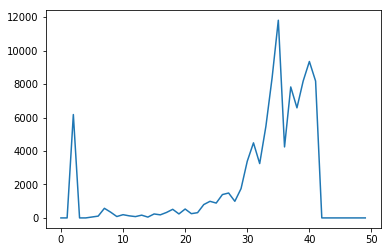

In [26]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

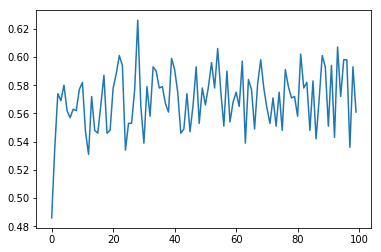

In [27]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [28]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, 'N': 18})

In [29]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [30]:
genome = readGenome('DNA.fa')

In [31]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [32]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p, t)

[0, 5, 9]

In [33]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [34]:
# Generate 100 reads of length 100
reads = generateReads(genome, 100, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


In [35]:
def readFastq(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

In [36]:
import collections
phix_reads = readFastq('AlternateDNA.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
count

Counter({'T': 30531, 'A': 28426, 'C': 21890, 'G': 19147, 'N': 6})

In [37]:
numMatched = 0
n = 0
for r in phix_reads:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

7 / 1000 reads matched the genome exactly!


In [38]:
# Now let's try matching just the first 30 bases of each read
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

459 / 1000 reads matched the genome exactly!


In [31]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [32]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

932 / 1000 reads matched the genome exactly!


# PREPROCESSING--Z ALGO & BOYER-MOORE

In [33]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [34]:
# GCTAGCTCTACGAGTCTA
p = 'TCAA'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.bad_character_rule(2, 'T')

2

In [35]:
# GCTAGCTCTACGAGTCTA
# ACTA
p = 'ACTA'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.good_suffix_rule(0)

3

In [36]:
# ACACGCTCTACGAGTCTA
# ACAC
p = 'ACAC'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.match_skip()

2

In [38]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [39]:
t = 'GCTAGCTCTACGAGTCTA'
p = 'TCTA'
p_bm = BoyerMoore(p, alphabet='ACGT')

In [40]:
boyer_moore(p, p_bm, t)

[6, 14]

# K-MER INDEXING

In [39]:
import bisect
import sys

In [42]:
class Index(object):
    def __init__(self, t, k):
        ''' Create index from all substrings of size 'length' '''
        self.k = k  # k-mer length (k)
        self.index = []
        for i in range(len(t) - k + 1):  # for each k-mer
            self.index.append((t[i:i+k], i))  # add (k-mer, offset) pair
        self.index.sort()  # alphabetize by k-mer
    
    def query(self, p):
        ''' Return index hits for first k-mer of P '''
        kmer = p[:self.k]  # query with first k-mer
        i = bisect.bisect_left(self.index, (kmer, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [43]:
def queryIndex(p, t, index):
    k = index.k
    offsets = []
    for i in index.query(p):
        if p[k:] == t[i+k:i+len(p)]:  # verify that rest of P matches
            offsets.append(i)
    return offsets

In [44]:
t = 'ACTTGGAGATCTTTGAGGCTAGGTATTCGGGATCGAAGCTCATTTCGGGGATCGATTACGATATGGTGGGTATTCGGGA'#p found at 21st and 68th Start-position
p = 'GGTATTCGGGA'

In [45]:
index = Index(t, 4)
print(queryIndex(p, t, index))

[21, 68]


# BOYER-MOORE & APPROXIMATE MATCHING

In [46]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [47]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [48]:
def approximate_match(p, t, n):
    segment_length = int(round(len(p) / (n+1)))
    all_matches = set()
    for i in range(n+1):
        start = i*segment_length
        end = min((i+1)*segment_length, len(p))
        p_bm = BoyerMoore(p[start:end], alphabet='ACGT')
        matches = boyer_moore(p[start:end], p_bm, t)
        # Extend matching segments to see if whole p matches
        for m in matches:
            if m < start or m-start+len(p) > len(t):
                continue
            mismatches = 0
            for j in range(0, start):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            for j in range(end, len(p)):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            if mismatches <= n:
                all_matches.add(m - start)
    return list(all_matches)

In [49]:
p = 'AACTTG'
t = 'CACTTAATTTG'
print(approximate_match(p, t, 2))

[0, 5]


In [50]:
def editDistRecursive(x, y):
    # This implementation is very slow
    if len(x) == 0:
        return len(y)
    elif len(y) == 0:
        return len(x)
    else:
        distHor = editDistRecursive(x[:-1], y) + 1
        distVer = editDistRecursive(x, y[:-1]) + 1
        if x[-1] == y[-1]:
            distDiag = editDistRecursive(x[:-1], y[:-1])
        else:
            distDiag = editDistRecursive(x[:-1], y[:-1]) + 1
        return min(distHor, distVer, distDiag)

In [51]:
def editDistance(x, y):
    # Create distance matrix
    D = []
    for i in range(len(x)+1):
        D.append([0]*(len(y)+1))
    # Initialize first row and column of matrix
    for i in range(len(x)+1):
        D[i][0] = i
    for i in range(len(y)+1):
        D[0][i] = i
    # Fill in the rest of the matrix
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1
            D[i][j] = min(distHor, distVer, distDiag)
    # Edit distance is the value in the bottom right corner of the matrix
    return D[-1][-1]

In [52]:
%%time
x = 'shake spea'
y = 'Shakespear'
editDistRecursive(x, y)

Wall time: 12.2 s


In [53]:
%%time
x = 'shake spea'
y = 'Shakespear'
editDistance(x, y)

Wall time: 0 ns


# PATTERN-MATCHING:

In [151]:
class findPattern ():
    """
    This class finds the occurance and position of a given pattern in a given 
    genomic sequence in a file.
    """
    def __init__(self, pattern, filename):
        # initiate parameters
        self.pattern = pattern
        self.filename = filename
        
    def readGenome (self):
        """
        read genomic DNA sequence to a string
        """
        genome = ""
        with open (self.filename, "r") as f:
            for line in f:
                # skip header
                if not line[0] == ">":
                    genome += line.rstrip()
            f.close()
        return genome
        
    
    def reverseComplement (self):
        """
        generate reverse complement sequence for a given dna sequence
        """
        complement = {"A": "T", "C": "G", "T": "A", "G": "C"}
        revComPattern = "" # reversed compliment pattern
        for nt in self.pattern:
            revComPattern = complement[nt] + revComPattern
        
        return revComPattern
        
    def match(self, string1, string2, numOfMismatch):
        """
        return True or False for matching results of two strings under the offset
        of numOfMismatch
        """
        counter = 0
        if len(string1) != len(string2):
            return False
        # loop over string to compare character
        for i in range(len(string1)):
            if string1[i] != string2[i]:
                counter += 1
        if counter > numOfMismatch:
            return False
        return True
        
    def patternIdentifier (self, numOfMismatch):
        """
        find positions of a given pattern and the reversed complement pattern 
        in a given genome
        """
        patternLength = len(self.pattern)
        genome = self.readGenome()
        revComPattern = self.reverseComplement()
        occurances = []
        
        for i in range (patternLength): # loop over pattern index
            # loop over genome patterns
            for j in range (i, len(genome), patternLength): 
                genomeMotif = genome[j: j+patternLength]
                # compare genomic motif and patterns
                if numOfMismatch == 0:
                    if (self.match(genomeMotif, self.pattern, 0) or \
                        self.match(genomeMotif, revComPattern, 0))\
                       and j not in occurances: # avoid duplicate records
                        occurances.append(j)
                else:
                    if self.match(genomeMotif, self.pattern, numOfMismatch)\
                       and j not in occurances: # avoid duplicate records:
                        occurances.append(j)
        return occurances
    
class checkQuality ():
    """
    The checkQuality class exams quality of sequencing for each cycle
    """
    def __init__ (self, filename):
        self.filename = filename
    
    def readFastq(self):
        """
        read dna sequence and quality base from a fastq sequencing file to lists
        """
        with open (self.filename, "r") as f:
             sequences = []
             qualities = []
             while True:
                 f.readline() # skip name line
                 seq = f.readline().rstrip() # read sequence line
                 f.readline() # skip strand line
                 qual = f.readline().rstrip() # read quality line
                 if len(seq) == 0: #finish read
                     break
                 # add seqence and quality information to list
                 sequences.append(seq)
                 qualities.append(qual)
             f.close()
        return sequences, qualities
        
    def phre33ToQ (self, qualString):
        """
        transform quality string to quality base score
        """
        qScore = []
        for qual in qualString:
            qScore.append(ord(qual) - 33)
        return qScore
    def findPoorQuality(self):
        """
        find the index of poorest q score in each sequencing
        """
        _, qualities = self.readFastq()
        lowestQScoreIndex = []
        for qualString in qualities:
            qScore = self.phre33ToQ(qualString)
            lowestQScoreIndex.append(qScore.index(min(qScore)))
        return lowestQScoreIndex
        
    def countPoorQuality(self):    
        """
        count number of poorest q score in each cycle
        """
        import collections
        return collections.Counter(self.findPoorQuality())
        
    def plotHist(self):
        """
         show the distribution of poorest q score
        """
        import matplotlib.pyplot as plt
        data = self.countPoorQuality()
        plt.bar(data.keys(), data.values())
        plt.show()


if __name__ == "__main__":
    #Test
    filename = "ConcatDNA.fastq"
    pattern = "ATTA"
    patterns = findPattern(pattern,filename)
    print("Test dataset results - Occurences and leftmost offset: ")
    print(len(patterns.patternIdentifier(0)), min(patterns.patternIdentifier(0)), "\n")
    
    #Questions 1-6
    filename1 = "DNA.fa"
    #Q1: How many times does AGGT or its reverse complement (ACCT) occur in the 
    #lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, 
    #you should report 22.
    pattern = "AGGT"
    patterns = findPattern(pattern,filename1)
    print("Q1: The 'AGGT' or 'ACCT' occurs %d times \n" \
           %len(patterns.patternIdentifier(0)))
    
    #Q2: How many times does TTAA or its reverse complement occur in the lambda 
    #virus genome? Hint: TTAA and its reverse complement are equal, so remember 
    #not to double count.    
    pattern = "TTAA"
    patterns = findPattern(pattern,filename1)
    print("Q2: The 'TTAA' occurs %d times \n" \
           %len(patterns.patternIdentifier(0)))
    
    #Q3: What is the offset of the leftmost occurrence of ACTAAGT or its reverse
    #complement in the Lambda virus genome? E.g. if the leftmost occurrence of 
    #ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse 
    #complement ACTTAGT is at offset 29, then report 29.
    pattern = "ACTAAGT"
    patterns = findPattern(pattern,filename1)
    print("Q3: The offset of the leftmost occurrence of ACTAAGT is %d \n" \
           %min(patterns.patternIdentifier(0)))
    
    #Q4: What is the offset of the leftmost occurrence of AGTCGA or its reverse 
    #complement in the Lambda virus genome?
    pattern = "AGTCGA"
    patterns = findPattern(pattern,filename1)
    print("Q4: The offset of the leftmost occurrence of AGTCGA is %d \n" \
           %min(patterns.patternIdentifier(0)))
           
    #Q5: How many times does TTCAAGCC occur in the Lambda virus genome when 
    #allowing up to 2 mismatches?    
    pattern = "TTCAAGCC"
    patterns = findPattern(pattern,filename1)
    print("Q5: The 'TTCAAGCC' occurs %d times with mismatch less than 2 \n" \
           %len(patterns.patternIdentifier(2)))
       
    #Q6: What is the offset of the leftmost occurrence of AGGAGGTT in the 
    #Lambda virus genome when allowing up to 2 mismatches?   
    pattern = "AGGAGGTT"
    patterns = findPattern(pattern,filename1)
    print("Q6: The offset of the leftmost occurrence of AGGAGGTT with mismatch less than 2 is %d \n" \
          %min(patterns.patternIdentifier(2)))      
      
    #Q7: Report which sequencing cycle has the problem.    
    filename2 = "DNA.fastq"
    qualities = checkQuality(filename2)

Test dataset results - Occurences and leftmost offset: 
12646 21 

Q1: The 'AGGT' or 'ACCT' occurs 36 times 

Q2: The 'TTAA' occurs 35 times 

Q3: The offset of the leftmost occurrence of ACTAAGT is 3708 

Q4: The offset of the leftmost occurrence of AGTCGA is 53 

Q5: The 'TTCAAGCC' occurs 32 times with mismatch less than 2 

Q6: The offset of the leftmost occurrence of AGGAGGTT with mismatch less than 2 is 945 



In [152]:
import bisect

class findPatternV2 ():
    """
    This class finds the occurence and position of a given pattern in a given 
    genomic sequence in a file.
    """
    def __init__(self, pattern, filename = False):
        # initiate parameters
        self.pattern = pattern
        self.filename = filename
        
    def readGenome (self):
        """
        read genomic DNA sequence to a string
        """
        genome = ""
        with open (self.filename, "r") as f:
            for line in f:
                # skip header
                if not line[0] == ">":
                    genome += line.rstrip()
            f.close()
        return genome
        
    def naiveMatch (self, numberOfMismatch, text = False):
        """
        this is naive match to find the index of matched patterns in a genome
        and calculate number of total character comparisons and alignments
        """
        if text != False: #for test cases
            genome = text
        else:
            genome = self.readGenome()
        pattern = self.pattern
        occurences = []
        alignments = 0
        comparisons = 0
        for i in range(len(genome) - len(pattern) + 1):
            match = True
            counter = 0
            for j in range(len(pattern)):
                comparisons += 1
                if pattern[j] != genome[i+j]:
                    counter += 1
                if counter > numberOfMismatch:
                    match = False
                    break
            if match:
                occurences.append(i)
            alignments += 1
        return occurences, alignments, comparisons
        
    def boyerMoore (self, numberOfMismatch, bm, text = False):
        """
        this is naive match to find the index of matched patterns in a genome
        and calculate number of total character comparisons and alignments
        """
        i = 0
        if text != False: #for test cases
            genome = text
        else:
            genome = self.readGenome()
        pattern = self.pattern
        occurences = []
        alignments = 0
        comparisons = 0
        while i < len(genome) - len(pattern) + 1:
            shift = 1
            match = True
            for j in range(len(pattern) - 1, -1, -1):
                comparisons += 1
                if pattern[j] != genome[i+j]:
                    badCharacterSkip = bm.bad_character_rule(j, genome[i+j])
                    goodSuffixSkip = bm.good_suffix_rule(j)
                    shift = max(shift, badCharacterSkip, goodSuffixSkip)
                    match = False
                    break
            if match:
                occurences.append(i)
                goodSuffixSkip = bm.match_skip()
                shift = max(shift, goodSuffixSkip)
            i += shift
            alignments += 1
        return occurences, alignments, comparisons
        
    def matchedIndex(self, index, k_mer, pattern, isSubseqIndex):
        """
        find number of hits, occurences and time of occurence for a given pattern
        using string index in genome
        """
        genome = self.readGenome()
        occurences_match = []
        hit_index = []
        occurence_genome = []
        counter = 0
        if not isSubseqIndex:
            length = len(pattern)-k_mer + 1
        else:
            length = isSubseqIndex
        for i in range(length): # loop over to generate kmers
            if not isSubseqIndex:                
                pattern_q = pattern[i:i+k_mer]
            else:
                pattern_q = pattern[i:]
            hits = index.query(pattern_q) # query each kmer
            for hit in hits:
                counter += 1 #count total number of hits
                text = genome[hit-i : hit+len(pattern) -i]
                if hit-i not in hit_index: #avoid duplicated counts
                    hit_index.append(hit-i)
                    occurence, _, _ = self.naiveMatch(2,text)
                    occurences_match.extend(occurence)
                if len(occurence) != 0 and hit-i not in occurence_genome:
                    occurence_genome.append(hit-i) 
        return occurence_genome, len(occurences_match), counter
        
class Index(object):
    def __init__(self, t, k):
        ''' Create index from all substrings of size 'length' '''
        self.k = k  # k-mer length (k)
        self.index = []
        for i in range(len(t) - k + 1):  # for each k-mer
            self.index.append((t[i:i+k], i))  # add (k-mer, offset) pair
        self.index.sort()  # alphabetize by k-mer
    
    def query(self, p):
        ''' Return index hits for first k-mer of P '''
        kmer = p[:self.k]  # query with first k-mer
        i = bisect.bisect_left(self.index, (kmer, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits
    def genome_index(self):
         return self.index       

class SubseqIndex(object):
    """ Holds a subsequence index for a text T """
    
    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1)
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq
    
    def query(self, p):
        """ Return index hits for first subseq of p """
        subseq = p[:self.span:self.ival]  # query with first subseq
        i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != subseq:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

if __name__ == "__main__":
    from bm_preproc import BoyerMoore
    #Questions 1-3
    filename = ("DNA.fasta")
    #Q1: How many alignments does the naive exact matching algorithm try when 
    #matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG 
    #(derived from human Alu sequences) to the excerpt of human chromosome 1? 
    #(Don't consider reverse complements.)
    pattern = "GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG"
    patterns = findPatternV2(pattern, filename)
    print("Q1: The alignments for naive match algorithm is %d\n"%patterns.naiveMatch(0)[1])
    patterns = findPatternV2("GGCGCGGTGGCTCACGCCTGTAAT", filename)    
    
    #Q2: How many character comparisons does the naive exact matching algorithm 
    #try when matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG 
    #(derived from human Alu sequences) to the excerpt of human chromosome 1? 
    #(Don't consider reverse complements.)
    print("Q2: The characters comparisons for naive match algorithm is %d\n"%patterns.naiveMatch(0)[2])
    
    #How many alignments does Boyer-Moore try when matching the string 
    #GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG 
    #(derived from human Alu sequences) to the excerpt of human chromosome 1? 
    #(Don't consider reverse complements.)
    print("Q3: The Alignments for Boyer-Moore algorithm is %d\n"%patterns.boyerMoore(0, \
          BoyerMoore(pattern, "ACGT"))[1])
    
    #Q4: How many times does the string GGCGCGGTGGCTCACGCCTGTAAT, 
    #which is derived from a human Alu sequence, occur with up to 2 
    #substitutions in the excerpt of human chromosome 1? 
    #(Don't consider reverse complements here.)
    k_mer = 8      
    pattern = "GGCGCGGTGGCTCACGCCTGTAAT"
    genome = patterns.readGenome()
    index = Index(genome, k_mer)
    occurences, numberOfOccurs, numberOfhits = patterns.matchedIndex(index, \
                                               k_mer, pattern, isSubseqIndex = False)
    print("Q4: Within 2 mismatches, the string occurs %d times\n" %numberOfOccurs)
    
    #Q5:Using the instructions given in Question 4, how many total index hits 
    #are there when searching for occurrences of GGCGCGGTGGCTCACGCCTGTAAT with 
    #up to 2 substitutions in the excerpt of human chromosome 1?
    print("Q5: Within 2 mismatches, the total index hits are %d \n" %numberOfhits)
    
    #Q6: When using this function, how many total index hits are there when 
    #searching for GGCGCGGTGGCTCACGCCTGTAAT with up to 2 substitutions in the 
    #excerpt of human chromosome 1? (Again, don't consider reverse complements.)
    pattern = "GGCGCGGTGGCTCACGCCTGTAAT"
    k_mer = 8
    vial = 3
    index = SubseqIndex(genome, k_mer, vial)
    occurences, numberOfOccurs, numberOfhits = patterns.matchedIndex(index, \
                                               k_mer, pattern, isSubseqIndex = vial)

    print("Q6: Within 2 mismatches, the hits are %d\n" %numberOfhits)

Q1: The alignments for naive match algorithm is 5330

Q2: The characters comparisons for naive match algorithm is 7366

Q3: The Alignments for Boyer-Moore algorithm is 119

Q4: Within 2 mismatches, the string occurs 0 times

Q5: Within 2 mismatches, the total index hits are 1 

Q6: Within 2 mismatches, the hits are 0



In [153]:
from itertools import permutations

class findPatternV3 ():
    """
    This class finds the edit distance of a given pattern in a given genomic 
    sequence and constructs overlap graphs.
    """
    def __init__(self, filename, pattern = False):
        # initiate parameters
        self.pattern = pattern
        self.filename = filename
        
    def readGenome (self):
        """
        read genomic DNA sequence to a string
        """
        genome = ""
        with open (self.filename, "r") as f:
            for line in f:
                # skip header
                if not line[0] == ">":
                    genome += line.rstrip()
            f.close()
        return genome
        
    def readFastq(self):
        """
        read dna sequence and quality base from a fastq sequencing file to lists
        """
        with open (self.filename, "r") as f:
             sequences = []
             qualities = []
             while True:
                 f.readline() # skip name line
                 seq = f.readline().rstrip() # read sequence line
                 f.readline() # skip strand line
                 qual = f.readline().rstrip() # read quality line
                 if len(seq) == 0: #finish read
                     break
                 # add seqence and quality information to list
                 sequences.append(seq)
                 qualities.append(qual)
             f.close()
        return sequences, qualities
        
    def editDistance(self):
        """
        Implement dynamic algorithm to calculate edit distance between a given
        pattern and a given genome
        """
        pattern = self.pattern
        genome = self.readGenome()
        pattern_length = len(pattern) + 1
        genome_length = len(genome) + 1
        #generate matrix
        matrix = [[0]*genome_length for i in range(pattern_length)]
        # initiate the first column
        for i in range(pattern_length):
            matrix[i][0] = i
        for i in range(1, pattern_length):
            for j in range(1, genome_length):
                dist_hor = matrix[i][j-1] + 1
                dist_vel = matrix[i-1][j] + 1
                dist_diag = matrix[i-1][j-1] + 1 if pattern[i-1] != genome[j-1]\
                            else matrix[i-1][j-1]
                matrix[i][j] = min(dist_hor, dist_vel, dist_diag)
        return min(matrix[-1])                
            
    def phraseReads(self, k_mer):
        """
        construct the prefix and suffix of a read to a dictornary with read as
        key and pre-,suffix as values
        """
        reads, _ = self.readFastq()
        reads_dict = {}
        for read in reads:
            for i in range(len(read) - k_mer + 1):
                substring = read[i:i+k_mer]
                if substring not in reads_dict:
                    reads_dict[substring] = set([read])
                else:
                    reads_dict[substring].add(read)
        return reads_dict
    def overlap(self, read1, read2, k_mer):
        """
        find overlaped leftmost offset
        """
        start = 0
        while True:
            start = read1.find(read2[:k_mer], start)
            if start == -1:
                return 0 # without overlap
            if read2.startswith(read1[start:]):
                return len(read1) - start
            start += 1
            
    def overlapGraph(self, k_mer):
        """
        construct graph with key as a read (node) and values as all other 
        reads overlapped with the previous read (node)
        """
        reads_dict = self.phraseReads(k_mer)
        reads, _= self.readFastq()
        graph = {}
        for read1 in reads:
            k_mer_string = read1[len(read1) - k_mer:]
            if k_mer_string in reads_dict:
                edges = set([])
                reads_set = reads_dict[k_mer_string]
                for read2 in reads_set:
                    if read1 != read2: #skip self comparison
                        offset = self.overlap(read1, read2, k_mer)           
                        if offset > 0: # skip non-overlapped pairs
                            edges.add(read2) #add overlapped reads to be values
                            graph[read1] = edges           
        return graph
                        
    def naive_overlap_map(self, k_mer):
        """
        construct graph with key as a pair of reads with overlap and values as
        the leftmost offset of the overlap
        """
        graph = {}
        reads, _ = self.readFastq()
        for read1, read2 in permutations(reads, 2):
            #skip non-overlapped reads
            if read1[len(read1) - k_mer:] in read2:
                offset = self.overlap(read1, read2, k_mer)
                    # check if reads[i] overlapped with reads[j]
                if offset != 0:
                    graph[(read1,read2)] = offset  
        return graph

if __name__ == "__main__":
    
    #Q1: What is the edit distance of the best match between pattern 
    #GCTGATCGATCGTACG and the excerpt of human chromosome 1? 
    #(Don't consider reverse complements.)
    pattern = "GCTGATCGATCGTACG"
    filename = "DNA.fasta"
    patterns = findPatternV3 (filename, pattern)
    edit_dist = patterns.editDistance()
    print("Q1: the edit distance of the best match between pattern and the genome is %d\n"\
           %edit_dist)
           
    #Q2: What is the edit distance of the best match between pattern 
    #GATTTACCAGATTGAG and the excerpt of human chromosome 1? 
    #(Don't consider reverse complements.)
    pattern = "GATTTACCAGATTGAG"
    filename = "DNA.fasta"
    patterns = findPatternV3 (filename, pattern)
    edit_dist = patterns.editDistance()
    print("Q2: the edit distance of the best match between pattern and the genome is %d\n"\
           %edit_dist)
    
    #Q3: Picture the overlap graph corresponding to the overlaps just calculated. 
    # How many edges are in the graph? In other words, how many distinct pairs 
    # of reads overlap?
    #Q4: Picture the overlap graph corresponding to the overlaps computed for 
    #the previous question. How many nodes in this graph have at least one 
    #outgoing edge? (In other words, how many reads have a suffix involved in 
    #an overlap?)
    import time
    t1 = time.time()
    filename = "ConcatDNA.fastq"
    patterns = findPatternV3 (filename)
    k_mer = 30
    graph = patterns.naive_overlap_map(k_mer)
    t2 = time.time()
    print("Running time for naive overlap mapping: %d sec\n"%(t2 - t1))
    
    reads = patterns.phraseReads(k_mer)
    t3 = time.time()
    print("Running time for phrase reads: %d sec\n"%(t3 - t2))
    graph = patterns.overlapGraph(k_mer)
    t4 = time.time()
    print("Running time for optimized algorithm: %d sec\n"%(t4 - t2))
    numberOfNodes = len(graph)
    numberOfEdges = sum([len(edges) for edges in graph.values()])
    print("Q3: the total edges are %d\n"%numberOfEdges)
    print("Q4: the total nodes are %d"%numberOfNodes)

Q1: the edit distance of the best match between pattern and the genome is 4

Q2: the edit distance of the best match between pattern and the genome is 5

Running time for naive overlap mapping: 2 sec

Running time for phrase reads: 0 sec

Running time for optimized algorithm: 0 sec

Q3: the total edges are 3

Q4: the total nodes are 2


# DNA Sequencing Analysis

In [154]:
class dna_tool_sets ():
    """ 
    This class includes a set of tools for dna sequence analysis:
    a. count_records

    b. check_length
    
    c. orf_identifier
       
    d. repeats_identifier
    
    parameter: file name including path directory
    Note: the file should be in FASTA format
    
    """
    def __init__(self, file_name):
        """ this function open input file and transform each record to dictornary
            the key and value of the dict are header and dna sequence of the record,
            respectively
        """
        self.file_name = file_name # initiate loading file 
        self.dict = {} # initiate an empty dictornary
        f_reader = open (self.file_name)
        for line in f_reader:
            line = line.strip("\n") # remove "\n" in line
            if ">" in line: # check if this line is a header
                header = line # assign line to header
                self.dict[header] = "" #add header to dictornary with an initial empty string
            else:
                self.dict[header] += line # add dna sequence to the header accordingly
        f_reader.close()
    
    def count_records (self):
        """ this function count number of records in the file"""
        number_of_records = len(self.dict) # check records in dictornary
        # Q1: How many records are in the multi-FASTA file?
        print("Q1: How many records are in the multi-FASTA file: %d \n"\
               %number_of_records)
        #return number_of_records
        
    def check_length(self):
        """
        this function check length of each record and the according header 
        of the record
        """
        length_dict = {} # creat a dictornary to record length of each record
        for key, value in self.dict.items():
            length_dict[key] = len(value)
            
        lengths = length_dict.values() # count length for each sequence
        
        max_length = max(lengths) # max length of sequences 
        min_length = min(lengths) # min length of sequences
        # identifier of sequences with max length
        record_max_length = [item for item in length_dict if length_dict[item] == max_length]
        # identifier of sequences with min length        
        record_min_length = [item for item in length_dict if length_dict[item] == min_length]
        
        # Q2: What is the length of the longest sequence in the file?
        print("Q2: The length of the longest sequence: %d \n"%max_length, \
              "The number of longest sequence: %d \n"%len(record_max_length))
        # Q3: What is the length of the shortest sequence in the file?
        print("Q3: The length of the shortest sequence: %d \n"%min_length, \
              "The number of shortest sequence: %d \n"%len(record_min_length))
        # uncomment the return code to return the whole length information for 
        # each record
        #return length_dict
               
    def find_pos(self, dna):
        """ 
        help function for orf_identifier: 
        find start position and length for each read frame for a given sequence
        dna: sequence, string
        """
        start_code = "ATG"
        stop_codes = ["TAA", "TAG", "TGA"]

        pos_dict = {} #record orfs of each frame to dictornary
        
        for i in range(3): # walk through 3 different frames
            # record strat position and length for each frame to a list
            pos = []
            # generate frames
            if i == 0:
                frame = [dna[j:j+3] for j in range(i, len(dna), 3)]
            else:
                frame = [dna[:i]] + [dna[j:j+3] for j in range(i, len(dna), 3)]
            # find all possible start postions and stop positions
            start_pos = []
            stop_pos = []
            try:
                index_start_pos = [m for m, y in enumerate(frame) if \
                                  y == start_code]
                start_pos += index_start_pos # find possible positions for start code "ATG"
            except ValueError:
                pos.append((-1, 0)) # return -1 as start position if no ATG
                continue
 
            for stop_code in stop_codes:
                try:
                    # find all possible positions of stop codes
                    index_stop_code = [n for n, x in enumerate(frame) if \
                                       x == stop_code and n > min(start_pos)]
                    stop_pos += index_stop_code
                except ValueError:
                    continue
            if len(stop_pos) == 0: # add -1 as start position when no stop code find
                 pos.append((-1, 0))
            else:
                #find the closest paired code
                 while len(start_pos) != 0:
                     start = min(start_pos)
                     try:
                         end = min([stop for stop in stop_pos if stop > start])
                     except ValueError:
                         break     
                 # add start position and length
                     s_pos = len("".join(frame[:start])) + 1
                     pos.append((s_pos, (end - start + 1)*3))
                     start_pos.remove(start) 
            pos_dict["frame%d"%(i+1)] = pos 
            
        return pos_dict
        
    def revs_complement(dna):
        """
        help function for orf_identifier:
        to transform a sequence to reverse complementary sequence
        """
        pairs = {"A": "T", "C": "G", "G": "C", "T": "A"} # complementary code
        c_dna = [pairs[s] for s in dna] # complementary replace
        return "".join(c_dna)[::-1] # reverse
        
    
    def orf_identifier (self):
        """
        This function return all the orf information with start posiotion and
        length of orf in read frame 1, 2 and 3
        the values for frame 1, 2, and are represented as pairs of tuple in a list
        for example: {"header1": {"frame1":[(0, 100)], "frame2":[(20, 400)], "frame3":[(-1, 0)]},...} 
        represents for header1:
        frame1- start position: 0, length of orf: 100
        frame2- start position: 20, length of orf: 400
        frame3- No ORF detected
        """
        orf = {}
        for header, dna_seq in self.dict.items(): # generate orf for the whole file
            pos = self.find_pos(dna_seq)
            orf[header] = pos
        # find header for question 7
        id_key = [key for key in orf if "gi|142022655|gb|EQ086233.1|129" in key]
        idx = id_key[0]  
        # generate list of frames for questions 4 to 7
        frame1, frame2, all_frames, id_frames = [], [], [], []
        for key, dict_value in orf.items():
            frame1 += dict_value["frame1"]
            frame2 += dict_value["frame2"]
            frames = dict_value["frame1"] + dict_value["frame2"] + dict_value["frame3"]
            all_frames += frames
            if key == idx:
                id_frames = dict_value["frame1"] + dict_value["frame2"] + dict_value["frame3"]
            
        #Q4: What is the length of the longest ORF appearing in reading
        #frame 2 of any of the sequences?
        frame2_max_length = max(frame2, key = lambda x: x[1])
        print("Q4: The length of longest ORF in frame2: %d\n"%frame2_max_length[1])
        #Q5: What is the starting position of the longest ORF in reading frame 1 
        #in any of the sequences? 
        
        frame1_max_length_pos = max(frame1, key = lambda x: x[1])
        print("Q5: The start position of longest ORF in frame1: %d\n"%frame1_max_length_pos[0])
        #Q6: What is the length of the longest ORF appearing in any sequence and 
        #in any forward reading frame?
        max_length = max(all_frames, key = lambda x: x[1])
        print("Q6: The longest ORF of all frames and sequences: %d\n"%max_length[1])
        #Q7: What is the length of the longest forward ORF that appears in the 
        #sequence with the identifier gi|142022655|gb|EQ086233.1|129?

        max_length_id = max(id_frames, key = lambda x: x[1])
        print("Q7: The length of longest ORF for ", idx, "is: %d \n" %max_length_id[1])
        
        # uncomment the return code to return the whole orf information 
        #including starting position and length of each frame for each sequence
        
        #return orf
            
    def find_repeats(self, dna, n):
        """
        This help function for repeats_identifier find and count repeats for 
        each dna sequence
        dna: sequence, string
        n: number of repeats, int
        """
        repeats = {}
        for i in range(0, len(dna)):
            repeat = dna[i:i+n] # generate possible repeats
            if len(repeat) == n:
                if repeat not in repeats:
                    repeats [repeat] = 1 # initiate record
                else:
                    # count repeated repeats
                    repeats[repeat] = repeats.get(repeat) + 1
        return repeats
    
    def repeats_identifier(self, n):
        """
        This function generates repeats with counts for each record 
        (repeats_set) and for the whole file (combined_repeats)
        n: number of repeats, int
        """
        # record the repeats with counts for each record 
        repeats_set = {}
        for header, dna_seq in self.dict.items():
            repeats = self.find_repeats(dna_seq, n)
            repeats_set[header] = repeats 
        # record the repeats with counts for the whole file
        combined_repeats = {}
        for dict_value in repeats_set.values():
            for key in dict_value:
                if key not in combined_repeats:
                    combined_repeats[key] = dict_value[key]
                else:
                    combined_repeats[key] = combined_repeats.get(key) \
                                            + dict_value[key]
        # Q8:Find the most frequently occurring repeat of length 7 in all 
        # sequences. How many times does it occur in all?
        if n == 7:
            most_freq_7 = max (combined_repeats.values())
            print("Q8: The most frequently repeats occur: %d times \n"%most_freq_7)
        # Q10:Which one of the following repeats of length 7 has a maximum 
        #number of occurrences?
            most_freq_7_seq = [key for key in combined_repeats if \
                       combined_repeats[key] == max(combined_repeats.values())]
            print("Q10: The following repeats occured most frequently: \n", most_freq_7_seq)
        # Q9:Find all repeats of length 10 in the input file. Let's use Max to 
        #specify the number of copies of the most frequent repeat of length 10. 
        #How many different 10-base sequences occur Max times?
        if n == 10:
            # answer question 9
            count_most_freq_10 = len([value for value in combined_repeats.values()\
                             if value == max(combined_repeats.values())])
        
        
            print("Q9: The number of different 10-base sequences occur max times: %d \n"\
                  %count_most_freq_10)
        
        # uncomment the return code to return the repeats with counts for each record 
        # (repeats_set) and for the whole file (combined_repeats)
        #return repeats_set, combined_repeats
        
if __name__ == "__main__":
    
    file_name = "dna3.fasta"
    dna_tools = dna_tool_sets (file_name)
    # Q1: How many records are in the multi-FASTA file?
    dna_tools.count_records()
    
    # Q2: What is the length of the longest sequence in the file?
    # Q3: What is the length of the shortest sequence in the file?
    dna_tools.check_length()
    
    #Q4: What is the length of the longest ORF appearing in reading
    #frame 2 of any of the sequences?
    #Q5: What is the starting position of the longest ORF in reading frame 1 
    #in any of the sequences? 
    #Q6: What is the length of the longest ORF appearing in any sequence and 
    #in any forward reading frame?
    #Q7: What is the length of the longest forward ORF that appears in the 
    #sequence with the identifier gi|142022655|gb|EQ086233.1|129?
    dna_tools.orf_identifier()
    
    # Q8:Find the most frequently occurring repeat of length 7 in all 
    # sequences. How many times does it occur in all?
    # Q10:Which one of the following repeats of length 7 has a maximum 
    #number of occurrences?
    dna_tools.repeats_identifier(7)
    
    # Q9:Find all repeats of length 10 in the input file. Let's use Max to 
    #specify the number of copies of the most frequent repeat of length 10. 
    #How many different 10-base sequences occur Max times?
    dna_tools.repeats_identifier(10)

Q1: How many records are in the multi-FASTA file: 17 

Q2: The length of the longest sequence: 4773 
 The number of longest sequence: 1 

Q3: The length of the shortest sequence: 37 
 The number of shortest sequence: 1 

Q4: The length of longest ORF in frame2: 1479

Q5: The start position of longest ORF in frame1: 22

Q6: The longest ORF of all frames and sequences: 1479

Q7: The length of longest ORF for  >gi|142022655|gb|EQ086233.1|129 marine metagenome JCVI_SCAF_1096627390048 genomic scaffold, whole genome shotgun sequence is: 885 

Q8: The most frequently repeats occur: 55 times 

Q10: The following repeats occured most frequently: 
 ['CGCGGCG']
Q9: The number of different 10-base sequences occur max times: 2 



# SEQUENCES ALIGNMENT

In [156]:
from utils import cost, addgap, print_table, deletion, substitution, insertion
from alignment import align_nw_2by2, align_star_multiple
from numpy.random import choice, randint
import numpy as np

In [157]:
np.random.seed(42)

In [158]:
alphabet = ["A", "C", "G", "T"] # nucleotides to consider for DNA sequences

In [159]:
for i in range(5):
    l1 = choice(alphabet)
    l2 = choice(alphabet)
    print("The cost of ({}, {}) equals {}.".format(l1, l2, cost(l1, l2)))

The cost of (G, T) equals -1.
The cost of (A, G) equals -1.
The cost of (G, T) equals -1.
The cost of (A, A) equals 2.
The cost of (G, C) equals -1.


In [160]:
seq = ''.join(choice(alphabet, 7))
gaplist = randint(7+5, size=5)
print("The initial sequence equals: {} and the gaplist equals: {}.".format(seq, gaplist))
newseq = addgap(seq, gaplist, verbose=1)
print("The final sequence equals:   {}.".format(newseq))

The initial sequence equals: GGGGTAT and the gaplist equals: [7 7 2 5 4].
gap introduced in 7th position -> new sequence equals GGGGTAT_.
gap introduced in 7th position -> new sequence equals GGGGTAT__.
gap introduced in 2th position -> new sequence equals GG_GGTAT__.
gap introduced in 5th position -> new sequence equals GG_GG_TAT__.
gap introduced in 4th position -> new sequence equals GG_G_G_TAT__.
The final sequence equals:   GG_G_G_TAT__.


The initial sequences are:
ATGAGAT AGGAGAGT
The aligned sequences are:
['ATGAGA_T', 'AGGAGAGT']
The positions of the introduced gaps are:
[]
The score matrix equals:


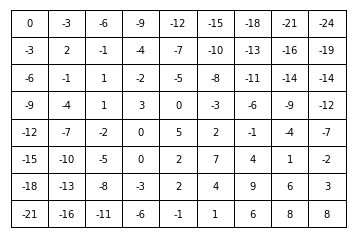

None
The path matrix equals:


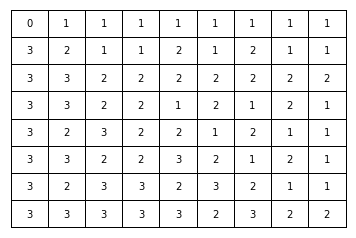

None


In [161]:
s1 = "ATGAGAT"
s2 = "AGGAGAGT"
res2by2 = align_nw_2by2(s1, s2)
print("The initial sequences are:")
print(s1, s2)
print("The aligned sequences are:")
print(res2by2[2])
print("The positions of the introduced gaps are:")
print(res2by2[3])
print("The score matrix equals:")
print(print_table(res2by2[0]))
print("The path matrix equals:")
print(print_table(res2by2[1]))

In [162]:
align_star_multiple(["ATGAGAT", "AGGAGAGT", "GGAGG", "AGGGAGT", "AGAAC"])

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
scores2a2 = [8.0, -2.0, 3.0, 1.0, 1.0, 11.0, -2.0, 1.0, 1.0, -2.0]
global scores = [10.0, 18.0, 1.0, 13.0, -2.0]
pivot sequence =  AGGAGAGT
initial seqs =
ATGAGAT
AGGAGAGT
GGAGG
AGGGAGT
AGAAC
res aligned to pivot =
ATGAGA_T
AGGAGAGT
_GGAG_G_
AGG_GAGT
A_GA_A_C


['ATGAGA_T', 'AGGAGAGT', '_GGAG_G_', 'AGG_GAGT', 'A_GA_A_C']

In [163]:
n = 10 # length of the initial sequence
seq0 = choice(alphabet, n)
seq0 = ''.join(seq0)

# seq 1 = substitution middle
seq1 = substitution(seq0, int(n/2))
# seq 2 = deletion middle
seq2 = deletion(seq0, int(n/2)-1)
# seq 3 = insertion middle
seq3 = insertion(seq0, int(n/2))

# seq 4 = substitution begining
seq4 = substitution(seq0, 0)
# seq 5 = deletion begining
seq5 = deletion(seq0, 0)
# seq 6 = insertion begining
seq6 = insertion(seq0, 0)

# seq 7 = substitution end
seq7 = substitution(seq0, -1)
# seq 8 = deletion end
seq8 = deletion(seq0, -1)
# seq 9 = insertion end
seq9 = insertion(seq0, -1)

# global alignement
align_star_multiple([seq0, seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9])

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
scores2a2 = [17.0, 15.0, 17.0, 17.0, 15.0, 17.0, 17.0, 15.0, 17.0, 15.0, 14.0, 14.0, 12.0, 14.0, 14.0, 12.0, 14.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 12.0, 14.0, 14.0, 12.0, 16.0, 15.0, 14.0, 14.0, 12.0, 14.0, 12.0, 12.0, 10.0, 12.0, 14.0, 12.0, 14.0, 15.0, 14.0, 12.0]
global scores = [147.0, 126.0, 114.0, 125.0, 126.0, 112.0, 123.0, 126.0, 112.0, 125.0]
pivot sequence =  CTTCCCTTAA
initial seqs =
CTTCCCTTAA
CTTCCGTTAA
CTTCCTTAA
CTTCCCCTTAA
ATTCCCTTAA
TTCCCTTAA
TCTTCCCTTAA
CTTCCCTTAC
CTTCCCTTA
CTTCCCTTAAA
res aligned to pivot =
_CTT_CCCTT_AA
_CTT_CCGTT_AA
_CTT__CCTT_AA
_CTTCCCCTT_AA
_ATT_CCCTT_AA
__TT_CCCTT_AA


['_CTT_CCCTT_AA',
 '_CTT_CCGTT_AA',
 '_CTT__CCTT_AA',
 '_CTTCCCCTT_AA',
 '_ATT_CCCTT_AA',
 '__TT_CCCTT_AA',
 'TCTT_CCCTT_AA',
 '_CTT_CCCTT_AC',
 '_CTT_CCCTT__A',
 '_CTT_CCCTTAAA']

In [164]:
n = 10 # length of the initial sequence
seq0 = choice(alphabet, n)
seq0 = ''.join(seq0)

# seq 1 = substitution middle
seq1 = substitution(seq0, int(n/2))
seq1 = substitution(seq1, int(n/2)+1)
# seq 2 = deletion middle
seq2 = deletion(seq0, int(n/2)-1)
seq2 = deletion(seq2, int(n/2)-1)
# seq 3 = insertion middle
seq3 = insertion(seq0, int(n/2))
seq3 = insertion(seq3, int(n/2))


# seq 4 = substitution begining
seq4 = substitution(seq0, 0)
seq4 = substitution(seq4, 1)
# seq 5 = deletion begining
seq5 = deletion(seq0, 0)
seq5 = deletion(seq5, 0)
# seq 6 = insertion begining
seq6 = insertion(seq0, 0)
seq6 = insertion(seq6, 0)

# seq 7 = substitution end
seq7 = substitution(seq0, -1)
seq7 = substitution(seq7, -2)
# seq 8 = deletion end
seq8 = deletion(seq0, -1)
seq8 = deletion(seq8, -1)
# seq 9 = insertion end
seq9 = insertion(seq0, -1)
seq9 = insertion(seq9, -1)

# global alignement
align_star_multiple([seq0, seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9])

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
scores2a2 = [14.0, 10.0, 14.0, 14.0, 10.0, 14.0, 14.0, 10.0, 14.0, 10.0, 11.0, 8.0, 4.0, 8.0, 8.0, 4.0, 8.0, 4.0, 4.0, 7.0, 4.0, 4.0, 10.0, 4.0, 8.0, 4.0, 10.0, 8.0, 4.0, 9.0, 10.0, 8.0, 8.0, 4.0, 8.0, 4.0, 4.0, 1.0, 4.0, 8.0, 4.0, 8.0, 10.0, 8.0, 4.0]
global scores = [114.0, 75.0, 57.0, 72.0, 72.0, 48.0, 68.0, 72.0, 51.0, 67.0]
pivot sequence =  GGGCTTTTGC
initial seqs =
GGGCTTTTGC
GGGCTCGTGC
GGGCTTGC
GGGCTGCTTTGC
TAGCTTTTGC
GCTTTTGC
AGGGGCTTTTGC
GGGCTTTTTT
GGGCTTTT
GGGCTTTTGAAC
res aligned to pivot =
GGGCT__TTTGC
GGGCT__CGTGC
GGGC____TTGC
GGGCTGCTTTGC
TAGCT__TTTGC
__GCT__TTTGC
AGGGGCTTTTGC
GGGCT__TTTTT
GGGCT__TTT__
GGGCTT

['GGGCT__TTTGC',
 'GGGCT__CGTGC',
 'GGGC____TTGC',
 'GGGCTGCTTTGC',
 'TAGCT__TTTGC',
 '__GCT__TTTGC',
 'AGGGGCTTTTGC',
 'GGGCT__TTTTT',
 'GGGCT__TTT__',
 'GGGCTTTTGAAC']

In [165]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from numpy.random import choice


def cost(letter1, letter2):
    """ Calculate the cost or score of the alignment of 2 letters.
    Parameters:
    ----------
    letter1: character
    letter2: character
    Return:
    ------
    score: int
        score of the alignment (-1 if the 2 letters are different, 2 if they are similar)
    """
    if letter1 == letter2:
        return 2
    else:
        return -1


def addgap(seq, gaplist, verbose=0):
    """ Insert gaps into sequence.
    Parameters:
    ----------
    seq: string of characters
        sequence of nucleotides
    gaplist: list of int
        list of gaps to insert successively in the sequence seq
    Return:
    ------
    newseq: string of characters
        the modified sequence with inserted gaps
    """
    newseq = seq[:]
    for g in gaplist:
        if g > len(newseq):
            print("gap postion bigger than sequence length -> gap inserted at the end of the sequence")
        newseq = newseq[:g] + '_' + newseq[g:]
        if verbose > 0:
            print("gap introduced in {}th position -> new sequence equals {}.".format(g, newseq))
    return newseq


def substitution(seq, pos, verbose=0, value=None, alphabet=["A", "C", "G", "T"]):
    """ Induce a mutation of the sequence by substituting a letter.
    Parameters:
    ----------
    seq: string of characters
        sequence of nucleotides
    pos: int in [-len(seq), len(seq)]
        position of the mutation
    verbose: int (default=0)
        level of verbosity
    value: None or alphabet item (default=None)
        new letter induced by the mutation.
        if None, an item different from the initial one is randomly chosen in alphabet.
    alphabet: list of characters (default=["A", "C", "G", "T"])
        list of nucleotides to consider in sequences
    Return:
    ------
    seqr: string
        the modified sequence containing the mutation
    """
    seqr = list(seq[:])
    alphabis = alphabet.copy()
    alphabis.remove(seqr[pos])
    if value == None:
        seqr[pos] = choice(alphabis, 1)[0]
    elif value in alphabet:
        seqr[pos] = value
    else:
        return "error"
    seqr = "".join(seqr)
    if verbose > 0:
        print(seqr)
    return seqr


def insertion(seq, pos, verbose=0, value=None, alphabet=["A", "T", "G", "C"]):
    """ Induce a mutation of the sequence by inserting a new letter.
    Parameters:
    ----------
    seq: string of characters
        sequence of nucleotides
    pos: int in [-len(seq), len(seq)]
        position of the mutation
    verbose: int (default=0)
        level of verbosity
    value: None or alphabet item (default=None)
        new letter induced by the mutation.
        if None, an item different from the initial one is randomly chosen in alphabet.
    alphabet: list of characters (default=["A", "C", "G", "T"])
        list of nucleotides to consider in sequences
    Return:
    ------
    seqr: string
        the modified sequence containing the mutation
    """
    seqr = seq[:]
    if value is None:
        value = choice(alphabet, 1)[0]
    seqr = seqr[:pos] + value + seqr[pos:]
    seqr = "".join(seqr)
    if verbose > 0:
        print(seqr)
    return seqr


def deletion(seq, pos, verbose=0):
    """ Induce a mutation of the sequence by deleting a letter.
    Parameters:
    ----------
    seq: string of characters
        sequence of nucleotides
    pos: int in [-len(seq), len(seq)]
        position of the mutation
    verbose: int (default=0)
        level of verbosity
    Return:
    ------
    seqr: string
        the modified sequence containing the mutation
    """
    seqr = list(seq[:])
    del seqr[pos]
    seqr = "".join(seqr)
    if verbose > 0:
        print(seqr)
    return seqr


def print_table(table):
    """ Display the score or path matrix as a table.
    Parameters:
    ----------
    table: matrix of floats or int
        score or path matrix
    Return:
    ------
    none
    """
    plt.figure()
    tb = plt.table(cellText=table.astype(int), loc=(0,0), cellLoc='center')
    tc = tb.properties()['child_artists']
    for cell in tc:
        cell.set_height(1/table.shape[0])
        cell.set_width(1/table.shape[1])
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


if __name__ == "__main__":

    alphabet = ["A", "C", "G", "T"]

    print("TEST ADDGAP FUNCTION")
    seq = choice(alphabet, 7)
    seq = ''.join(seq)
    gaplist = [1, 4, 7, 0, 0]
    newseq = addgap(seq, gaplist)
    print("The initial sequence equals: {} and the gaplist equals: {}. "
          "The final sequence equals: {}.".format(seq, gaplist, newseq))

    print("TEST COST FUNCTION")
    for i in range(5):
        l1 = choice(alphabet)
        l2 = choice(alphabet)
        print("The cost of ({}, {}) equals {}.".format(l1, l2, cost(l1, l2)))

TEST ADDGAP FUNCTION
The initial sequence equals: GCTATCC and the gaplist equals: [1, 4, 7, 0, 0]. The final sequence equals: __G_CT_AT_CC.
TEST COST FUNCTION
The cost of (C, A) equals -1.
The cost of (C, A) equals -1.
The cost of (C, T) equals -1.
The cost of (T, G) equals -1.
The cost of (T, G) equals -1.


# LOCAL ALIGNMENT

In [167]:
import numpy as np
import pandas as pd

class local_alignment:
    def __init__(self, match_award, mismatch_penalty, gap_penalty):
        self.match_award = match_award
        self.mismatch_penalty = mismatch_penalty
        self.gap_penalty = gap_penalty
        self.order_stack = []
        self.index_stack = []
        
    def check_match(self, data, i, j):
        if data.index[i] == data.columns[j]: return self.match_award
        else: return self.mismatch_penalty
    
    def make_matrix(self, first_seq, second_seq):
        first_seq2 = ["-"]
        second_seq2 = ["-"]
        first_seq2.extend(list(first_seq))
        second_seq2.extend(list(second_seq))
        
        data = [np.zeros(len(first_seq2), dtype='int32') for i in second_seq2]
        data = pd.DataFrame(data, columns=first_seq2, index=second_seq2)
        
        # save the route to trace back
        flag = []
        
        # fill out the matrix
        for i in range(1, data.shape[0]):
            temp = []
            for j in range(1, data.shape[1]):
                value_score = [data.iloc[i,j-1]+self.gap_penalty,
                               data.iloc[i-1,j-1]+self.check_match(data, i, j),
                               data.iloc[i-1,j]+self.gap_penalty,
                               0]
                data.iloc[i,j] = max(value_score)
                temp.append([data.iloc[i,j] == item for item in value_score])
            flag.append(temp)
        return data, flag
    
    def extract_max(self, data):
        temp = np.array(data.max())
        col = np.where(temp == temp.max())[0][0]
        temp = data.iloc[:,col]
        row = np.where(temp == temp.max())[0][0]
        return data.max().max(), row, col
        
    def extract_position(self, i, j, position):
        if position == 0: return [i,j-1]
        elif position == 1: return [i-1,j-1]
        elif position == 2: return [i-1,j]
        else: return None
    
    def stack_route(self, i, j, data, flag, point):
        term = flag[i][j]
        cnt = flag[i][j].count(True)
        
        # stack order
        for k in range(cnt): self.order_stack.append(point)
        
        # stack index
        if cnt == 1:
            pos = term.index(True)
            self.index_stack.append(self.extract_position(i, j, pos))
        elif cnt == 2:
            term = np.array(term)
            term = np.where(term == True)[0]
            self.index_stack.append(self.extract_position(i, j, term[0]))
            self.index_stack.append(self.extract_position(i, j, term[1]))
        elif cnt == 3:
            for k in range(3): self.index_stack.append(self.extract_position(i, j, k))
        else:
            print("error: 'cnt' is out of range (1,3)")
        return None
    
    def backtracking(self, data, flag, row, col):
        i = row - 1
        j = col - 1
        point = 0
        key = 0
        seq_dic = {str(key):[[i,j]]}
        
        # make index list
        while i >= 0 or j >= 0:
            self.stack_route(i, j, data, flag, point)
            self.order_stack.pop()
            term = self.index_stack.pop()
            i, j = term[0], term[1]
            if data.iloc[i+1,j+1] == 0: break
            seq_dic[str(key)].append(term)
            point += 1
            if len(self.order_stack) != 0 and i < 0 or j < 0:
                point = self.order_stack.pop()
                term = self.index_stack.pop()
                i, j = term[0], term[1]
                if data.iloc[i+1,j+1] == 0: break
                key += 1
                seq_dic[str(key)] = seq_dic[str(key-1)][:point+1]
                seq_dic[str(key)].append(term)
        
        # convert index list to name list
        key = 0
        for value in seq_dic.values():
            row, col = [i for i in zip(*value)]
            row = [row[i] if row[i] != row[i+1] else -1 for i in range(len(row)-1)] + [row[-1]]
            col = [col[i] if col[i] != col[i+1] else -1 for i in range(len(col)-1)] + [col[-1]]
            
            row = [data.index[i+1] for i in row]
            col = [data.columns[i+1] for i in col]
            row = "".join(row)[::-1]
            col = "".join(col)[::-1]
            seq_dic[str(key)] = [col, row]
            key += 1
        return seq_dic
    
if __name__ == "__main__":
    # input data
    print("----------- local alignment -----------")
    #first_seq = input("Please enter the first nucleotide sequence: ")
    #second_seq = input("Please enter the second nucleotide sequence: ")

    first_seq = "AACTCACACTGTT"
    second_seq = "TGCACACG"

    # assign award and penalties
    match_award = 3
    mismatch_penalty = -1
    gap_penalty = -2
    
    # local alignment
    process = local_alignment(match_award, mismatch_penalty, gap_penalty)
    data, flag = process.make_matrix(first_seq, second_seq)
    score, row, col = process.extract_max(data)
    seq_dic = process.backtracking(data, flag, row, col)
    for key in seq_dic.keys():
        print("< case",int(key)+1,">")
        print("score:", score)
        print(seq_dic[key][0])
        print(seq_dic[key][1])

----------- local alignment -----------
< case 1 >
score: 17
T-CACACTG
TGCACAC-G


In [168]:
data

,-,A,A,C,T,C,A,C,A,C,T,G,T,T
-,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T,0,0,0,0,3,1,0,0,0,0,3,1,3,3
G,0,0,0,0,1,2,0,0,0,0,1,6,4,2
C,0,0,0,3,1,4,2,3,1,3,1,4,5,3
A,0,3,3,1,2,2,7,5,6,4,2,2,3,4
C,0,1,2,6,4,5,5,10,8,9,7,5,3,2
A,0,3,4,4,5,3,8,8,13,11,9,7,5,3
C,0,1,2,7,5,8,6,11,11,16,14,12,10,8
G,0,0,0,5,6,6,7,9,10,14,15,17,15,13


#  Global Alignment Algorithm

In [170]:
import numpy as np
import pandas as pd

class global_alignment:
    def __init__(self, match_award, mismatch_penalty, gap_penalty):
        self.match_award = match_award
        self.mismatch_penalty = mismatch_penalty
        self.gap_penalty = gap_penalty
        self.order_stack = []
        self.index_stack = []
        
    def check_match(self, data, i, j):
        if data.index[i] == data.columns[j]: return self.match_award
        else: return self.mismatch_penalty
    
    def make_matrix(self, first_seq, second_seq):
        first_seq2 = ["-"]
        second_seq2 = ["-"]
        first_seq2.extend(list(first_seq))
        second_seq2.extend(list(second_seq))
        
        data = [np.zeros(len(first_seq2), dtype='int32') for i in second_seq2]
        data = pd.DataFrame(data, columns=first_seq2, index=second_seq2)
        
        # fill 1st row and 1st column with gap_penalty
        data.iloc[0,:] = [self.gap_penalty*i for i in range(data.shape[1])]
        data.iloc[:,0] = [self.gap_penalty*i for i in range(data.shape[0])]
        
        # save the route to trace back
        flag = []
        
        # fill out the matrix
        for i in range(1, data.shape[0]):
            temp = []
            for j in range(1, data.shape[1]):
                value_score = [data.iloc[i,j-1]+self.gap_penalty,
                               data.iloc[i-1,j-1]+self.check_match(data, i, j),
                               data.iloc[i-1,j]+self.gap_penalty]
                data.iloc[i,j] = max(value_score)
                temp.append([data.iloc[i,j] == item for item in value_score])
            flag.append(temp)
        return data, flag
    
    def extract_position(self, i, j, position):
        if position == 0: return [i,j-1]
        elif position == 1: return [i-1,j-1]
        else: return [i-1,j]
    
    def stack_route(self, i, j, data, flag, point):
        term = flag[i][j]
        cnt = flag[i][j].count(True)
        
        # stack order
        for k in range(cnt): self.order_stack.append(point)
        
        # stack index
        if cnt == 1:
            pos = term.index(True)
            self.index_stack.append(self.extract_position(i, j, pos))
        elif cnt == 2:
            term = np.array(term)
            term = np.where(term == True)[0]
            self.index_stack.append(self.extract_position(i, j, term[0]))
            self.index_stack.append(self.extract_position(i, j, term[1]))
        elif cnt == 3:
            for k in range(3): self.index_stack.append(self.extract_position(i, j, k))
        else:
            print("error: 'cnt' is out of range (1,3)")
        return None
    
    def backtracking(self, data, flag):
        i = len(flag) - 1
        j = len(flag[0]) - 1
        maximum = max(i, j)
        point = 0
        key = 0
        seq_dic = {str(key):[[i,j]]}
        
        # make index list
        while point < maximum or i >= 0 or j >= 0:
            self.stack_route(i, j, data, flag, point)
            self.order_stack.pop()
            term = self.index_stack.pop()
            i, j = term[0], term[1]
            if i < 0 or j < 0: break
            seq_dic[str(key)].append(term)
            point += 1
            if point > maximum and len(self.order_stack) != 0:
                point = self.order_stack.pop()
                term = self.index_stack.pop()
                i, j = term[0], term[1]
                key += 1
                seq_dic[str(key)] = seq_dic[str(key-1)][:point+1]
                seq_dic[str(key)].append(term)
        
        # convert index list to name list
        key = 0
        for value in seq_dic.values():
            row, col = [i for i in zip(*value)]
            row = [row[i] if row[i] != row[i+1] else -1 for i in range(len(row)-1)] + [row[-1]]
            col = [col[i] if col[i] != col[i+1] else -1 for i in range(len(col)-1)] + [col[-1]]
            
            row = [data.index[i+1] for i in row]
            col = [data.columns[i+1] for i in col]
            row = "".join(row)[::-1]
            col = "".join(col)[::-1]
            seq_dic[str(key)] = [col, row]
            key += 1
        return seq_dic

if __name__ == "__main__":
    # input data
    print("----------- global alignment -----------")
    #first_seq = input("Please enter the first nucleotide sequence: ")
    #second_seq = input("Please enter the second nucleotide sequence: ")
    
    first_seq = "AGTCCTA"
    second_seq = "AGCCTTA"
    
    # assign award and penalties
    match_award = 3
    mismatch_penalty = -1
    gap_penalty = -2
    
    # global alignment
    process = global_alignment(match_award, mismatch_penalty, gap_penalty)
    data, flag = process.make_matrix(first_seq, second_seq)
    score = data.iloc[-1,-1]
    seq_dic = process.backtracking(data, flag)
    for key in seq_dic.keys():
        print("< case",int(key)+1,">")
        print("score:", score)
        print(seq_dic[key][0])
        print(seq_dic[key][1])

----------- global alignment -----------
< case 1 >
score: 14
AGTCCT-A
AG-CCTTA
< case 2 >
score: 14
AGTCC-TA
AG-CCTTA


In [171]:
data

,-,A,G,T,C,C,T,A
-,0,-2,-4,-6,-8,-10,-12,-14
A,-2,3,1,-1,-3,-5,-7,-9
G,-4,1,6,4,2,0,-2,-4
C,-6,-1,4,5,7,5,3,1
C,-8,-3,2,3,8,10,8,6
T,-10,-5,0,5,6,8,13,11
T,-12,-7,-2,3,4,6,11,12
A,-14,-9,-4,1,2,4,9,14


# Needleman and Wunsch Algorithm

In [172]:
# -*- coding: utf-8 -*-

import numpy as np
import itertools
import utils

from utils import cost, addgap


def align_nw_2by2(seq1, seq2):
    """ Perform 2 by 2 sequence alignment with the Needleman and Wunsch algorithm.
    Parameters:
    ----------
    seq1: string of characters of len=n1
        sequence of nucleotides
    seq2: string of characters of len=n2
        sequence of nucleotides
    Return:
    ------
    scores: matrix of floats of dim (n1+1, n2+1)
        
    paths: matrix of floats of dim (n1+1, n2+1)
        
    aligned: list of 2 strings
        contains the aligned seq1 and seq2 respectively 
    L: list of int
        list of the positions of the inserted gaps
    """
    n1, n2 = len(seq1), len(seq2)
    # initialization: path matrix, score matrix, aligned sequences list, gaps list
    paths = np.zeros((n1 + 1, n2 + 1))
    scores = np.zeros((n1 + 1, n2 + 1))
    aligned = ["", ""]
    L = []
    for i in range(1, n1 + 1):  # browsing seq1 indexes
        scores[i, 0] = scores[i - 1, 0] - 3
        paths[i, 0] = 3
        for j in range(1, n2 + 1):  # browsing seq2 indexes
            scores[0, j] = scores[0, j - 1] - 3
            paths[0, j] = 1
            c1 = scores[i - 1, j - 1] + cost(seq1[i - 1], seq2[j - 1])
            c2 = scores[i - 1, j] - 3
            c3 = scores[i, j - 1] - 3
            scores[i, j] = max(c1, c2, c3)
            if scores[i, j] == c1:
                paths[i, j] = 2
            elif scores[i, j] == c2:
                paths[i, j] = 3
            elif scores[i, j] == c3:
                paths[i, j] = 1

    while i != 0 or j != 0:
        if paths[i, j] == 1:
            aligned[0] += '_'
            aligned[1] += seq2[j - 1]
            j = j - 1
        elif paths[i, j] == 2:
            aligned[0] += seq1[i - 1]
            aligned[1] += seq2[j - 1]
            j = j - 1
            i = i - 1
        elif paths[i, j] == 3:
            aligned[0] += seq1[i - 1]
            aligned[1] += '_'
            L.append(j)  # save gaps introduced by alignment
            i = i - 1
    aligned[0] = aligned[0][::-1]
    aligned[1] = aligned[1][::-1]
    return scores, paths, aligned, L


def align_star_multiple(seqs, verbose=2):
    """ Perform 2 by 2 sequence alignment with the Needleman and Wunsch algorithm.
    Parameters:
    ----------
    seqs: list of strings of characters
        list of sequences of nucleotides to align
    verbose: int (default=1)
        level of verbosity
    Return:
    ------
    res: 
    """
    # enumerate all possible combinations of 2 sequences
    pairs = list(itertools.combinations(list(np.arange(len(seqs))), 2))
    if verbose > 1:
        print("pairs =", pairs)
    # compute 2 by 2 scores for all combinaisons
    scores2a2 = pairs.copy()
    for ip, p in enumerate(pairs):
        scores2a2[ip] = align_nw_2by2(seqs[p[0]], seqs[p[1]])[0][-1, -1]
    if verbose > 1:
        print("scores2a2 =", scores2a2)
    # compute global scores for each sequence as sum of 2by2 scores
    scores = [0]*len(seqs)
    for i in range(len(seqs)):
        scores[i] = np.sum([sc for sci, sc in enumerate(scores2a2) if i in pairs[sci]])
    if verbose > 1:
        print("global scores =", scores)
    # choose pivot sequence as the one with the best (highest) global score
    imax = scores.index(max(scores))  # index of the pivot sequence
    pivot = seqs[imax]  # pivot sequence
    if verbose > 0:
        print("pivot sequence = ", pivot)
    # align all w.r.t pivot
    if verbose > 0:
        print("initial seqs =")
        print("\n".join(str(s) for s in seqs))
    res = seqs.copy()
    # align all sequences all together
    for ir in range(len(res)):
        # align sequences to pivot
        if res[ir] != pivot:  # the pivot sequence does not need to be aligned to itself
            alignment = align_nw_2by2(res[ir], res[imax])
            res[ir], res[imax] = alignment[2]  # result of the alignment
            L = alignment[3]  # result list gap position to consider
            if res[imax] != pivot:  # if new gaps were introduced into the pivot sequence with the 2by2 alignment
                pivot = res[imax]  # update the pivot
            # and update all the other sequences by inserting the same gaps (positions stored in L)
            for i in range(ir):
                if res[i] != pivot:
                    res[i] = addgap(res[i], L)
    if verbose > 0:
        print("res aligned to pivot =\n")
        print("\n".join(str(r) for r in res))
    return res


if __name__ == "__main__":
    from numpy.random import choice

    ex = "ATGAGAT"
    print(addgap(ex, [5, 1, 0, 0, 0]))

    print("EXAMPLE 0 : 2a2\n")
    print(align_nw_2by2("ATGAGAT", "AGGAGAGT"))
    print("EXAMPLE 1 : COURSE PAGE 16\n")
    align_star_multiple(["ATGAGAT", "AGGAGAGT", "GGAGG", "AGGGAGT", "AGAAC"])
    print("EXAMPLE 2 : TEST ON SYNTHESIZED DATA\n")
    alphabet = ["A", "C", "G", "T"]
    seq0 = choice(alphabet, 7)
    seq0 = ''.join(seq0)
    print(seq0)
    # seq 1 = substitution middle
    seq1 = seq0[:]
    alphabet.remove(seq1[3])
    seq1 = list(seq1)
    seq1[3] = choice(alphabet, 1)[0]
    seq1 = "".join(seq1)
    print(seq1)
    # seq 2 = deletion pos 5 and end
    seq2 = list(seq0[:])
    seq2.remove(seq2[4])
    seq2.remove(seq2[5])
    seq2 = "".join(seq2)
    print(seq2)
    # seq 3 = insertion T beginning and insertion middle
    seq3 = seq0[:]
    seq3 = "T" + seq3
    seq3 = seq3[:4] + 'G' + seq3[4:]
    print(seq3)
    # seq 4 = double insertion AC end and insertion middle
    seq4 = seq0[:]
    seq4 = seq4 + "AC"
    seq4 = seq4[:4] + 'T' + seq4[4:]
    print(seq4)
    # global alignement
    align_star_multiple([seq0, seq1, seq2, seq3, seq4])

___A_TGAG_AT
EXAMPLE 0 : 2a2

(array([[  0.,  -3.,  -6.,  -9., -12., -15., -18., -21., -24.],
       [ -3.,   2.,  -1.,  -4.,  -7., -10., -13., -16., -19.],
       [ -6.,  -1.,   1.,  -2.,  -5.,  -8., -11., -14., -14.],
       [ -9.,  -4.,   1.,   3.,   0.,  -3.,  -6.,  -9., -12.],
       [-12.,  -7.,  -2.,   0.,   5.,   2.,  -1.,  -4.,  -7.],
       [-15., -10.,  -5.,   0.,   2.,   7.,   4.,   1.,  -2.],
       [-18., -13.,  -8.,  -3.,   2.,   4.,   9.,   6.,   3.],
       [-21., -16., -11.,  -6.,  -1.,   1.,   6.,   8.,   8.]]), array([[0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [3., 2., 1., 1., 2., 1., 2., 1., 1.],
       [3., 3., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 2., 2., 1., 2., 1., 2., 1.],
       [3., 2., 3., 2., 2., 1., 2., 1., 1.],
       [3., 3., 2., 2., 3., 2., 1., 2., 1.],
       [3., 2., 3., 3., 2., 3., 2., 1., 1.],
       [3., 3., 3., 3., 3., 2., 3., 2., 2.]]), ['ATGAGA_T', 'AGGAGAGT'], [])
EXAMPLE 1 : COURSE PAGE 16

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (1

# Smith-Waterman algorithm for local alignment

In [173]:
'''A Python implementation of the Smith-Waterman algorithm for local alignment
of nucleotide sequences.
'''

import argparse
import os
import re
import sys
import unittest


# These scores are taken from Wikipedia.
# en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm
match    = 2
mismatch = -1
gap      = -1
seq1     = "GTCCAGCAGAGCAAGTGATGCGAGAGCTGCCCATCCTCCAACCAGCATGCCCCTAGACATTGACACTGCATCGGAGTCAGGCCAAGATCCGCAGGACAGT"
seq2     = "GGAGTACGACTTCAGAGATCTCACTTGGTGTATCAACCCGCCAGAGAGAATCAAATTGGATTATGATCAATACTGTGCAGATGTGGCTGCTGAAGAACTC"


def main():
    try:
        parse_cmd_line()
    except ValueError as err:
        print('error:', err)
        return

    # The scoring matrix contains an extra row and column for the gap (-), hence
    # the +1 here.
    rows = len(seq1) + 1
    cols = len(seq2) + 1

    # Initialize the scoring matrix.
    score_matrix, start_pos = create_score_matrix(rows, cols)

    # Traceback. Find the optimal path through the scoring matrix. This path
    # corresponds to the optimal local sequence alignment.
    seq1_aligned, seq2_aligned = traceback(score_matrix, start_pos)
    assert len(seq1_aligned) == len(seq2_aligned), 'aligned strings are not the same size'

    # Pretty print the results. The printing follows the format of BLAST results
    # as closely as possible.
    alignment_str, idents, gaps, mismatches = alignment_string(seq1_aligned, seq2_aligned)
    alength = len(seq1_aligned)
    print()
    print(' Identities = {0}/{1} ({2:.1%}), Gaps = {3}/{4} ({5:.1%})'.format(idents,
          alength, idents / alength, gaps, alength, gaps / alength))
    print()
    for i in range(0, alength, 60):
        seq1_slice = seq1_aligned[i:i+60]
        print('Query  {0:<4}  {1}  {2:<4}'.format(i + 1, seq1_slice, i + len(seq1_slice)))
        print('             {0}'.format(alignment_str[i:i+60]))
        seq2_slice = seq2_aligned[i:i+60]
        print('Sbjct  {0:<4}  {1}  {2:<4}'.format(i + 1, seq2_slice, i + len(seq2_slice)))
        print()


def parse_cmd_line():
    '''Parse the command line arguments.

    Create a help menu, take input from the command line, and validate the
    input by ensuring it does not contain invalid characters (i.e. characters
    that aren't the bases A, C, G, or T).
    '''



    seq1 = "ATAGACGACATACAGACAGCATACAGACAGCATACAGA"
    seq2 = "TTTAGCATGCGCATATCAGCAATACAGACAGATACG"


def create_score_matrix(rows, cols):
    '''Create a matrix of scores representing trial alignments of the two sequences.

    Sequence alignment can be treated as a graph search problem. This function
    creates a graph (2D matrix) of scores, which are based on trial alignments
    of different base pairs. The path with the highest cummulative score is the
    best alignment.
    '''
    score_matrix = [[0 for col in range(cols)] for row in range(rows)]

    # Fill the scoring matrix.
    max_score = 0
    max_pos   = None    # The row and columbn of the highest score in matrix.
    for i in range(1, rows):
        for j in range(1, cols):
            score = calc_score(score_matrix, i, j)
            if score > max_score:
                max_score = score
                max_pos   = (i, j)

            score_matrix[i][j] = score

    assert max_pos is not None, 'the x, y position with the highest score was not found'

    return score_matrix, max_pos


def calc_score(matrix, x, y):
    '''Calculate score for a given x, y position in the scoring matrix.

    The score is based on the up, left, and upper-left neighbors.
    '''
    similarity = match if seq1[x - 1] == seq2[y - 1] else mismatch

    diag_score = matrix[x - 1][y - 1] + similarity
    up_score   = matrix[x - 1][y] + gap
    left_score = matrix[x][y - 1] + gap

    return max(0, diag_score, up_score, left_score)


def traceback(score_matrix, start_pos):
    '''Find the optimal path through the matrix.

    This function traces a path from the bottom-right to the top-left corner of
    the scoring matrix. Each move corresponds to a match, mismatch, or gap in one
    or both of the sequences being aligned. Moves are determined by the score of
    three adjacent squares: the upper square, the left square, and the diagonal
    upper-left square.

    WHAT EACH MOVE REPRESENTS
        diagonal: match/mismatch
        up:       gap in sequence 1
        left:     gap in sequence 2
    '''

    END, DIAG, UP, LEFT = range(4)
    aligned_seq1 = []
    aligned_seq2 = []
    x, y         = start_pos
    move         = next_move(score_matrix, x, y)
    while move != END:
        if move == DIAG:
            aligned_seq1.append(seq1[x - 1])
            aligned_seq2.append(seq2[y - 1])
            x -= 1
            y -= 1
        elif move == UP:
            aligned_seq1.append(seq1[x - 1])
            aligned_seq2.append('-')
            x -= 1
        else:
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[y - 1])
            y -= 1

        move = next_move(score_matrix, x, y)

    aligned_seq1.append(seq1[x - 1])
    aligned_seq2.append(seq1[y - 1])

    return ''.join(reversed(aligned_seq1)), ''.join(reversed(aligned_seq2))


def next_move(score_matrix, x, y):
    diag = score_matrix[x - 1][y - 1]
    up   = score_matrix[x - 1][y]
    left = score_matrix[x][y - 1]
    if diag >= up and diag >= left:     # Tie goes to the DIAG move.
        return 1 if diag != 0 else 0    # 1 signals a DIAG move. 0 signals the end.
    elif up > diag and up >= left:      # Tie goes to UP move.
        return 2 if up != 0 else 0      # UP move or end.
    elif left > diag and left > up:
        return 3 if left != 0 else 0    # LEFT move or end.
    else:
        # Execution should not reach here.
        raise ValueError('invalid move during traceback')


def alignment_string(aligned_seq1, aligned_seq2):
    '''Construct a special string showing identities, gaps, and mismatches.

    This string is printed between the two aligned sequences and shows the
    identities (|), gaps (-), and mismatches (:). As the string is constructed,
    it also counts number of identities, gaps, and mismatches and returns the
    counts along with the alignment string.

    AAGGATGCCTCAAATCGATCT-TTTTCTTGG-
    ::||::::::||:|::::::: |:  :||:|   <-- alignment string
    CTGGTACTTGCAGAGAAGGGGGTA--ATTTGG
    '''
    # Build the string as a list of characters to avoid costly string
    # concatenation.
    idents, gaps, mismatches = 0, 0, 0
    alignment_string = []
    for base1, base2 in zip(aligned_seq1, aligned_seq2):
        if base1 == base2:
            alignment_string.append('|')
            idents += 1
        elif '-' in (base1, base2):
            alignment_string.append(' ')
            gaps += 1
        else:
            alignment_string.append(':')
            mismatches += 1

    return ''.join(alignment_string), idents, gaps, mismatches


def print_matrix(matrix):
    '''Print the scoring matrix.

    ex:
    0   0   0   0   0   0
    0   2   1   2   1   2
    0   1   1   1   1   1
    0   0   3   2   3   2
    0   2   2   5   4   5
    0   1   4   4   7   6
    '''
    for row in matrix:
        for col in row:
            print('{0:>4}'.format(col))
        print()


class ScoreMatrixTest(unittest.TestCase):
    '''Compare the matrix produced by create_score_matrix() with a known matrix.'''
    def test_matrix(self):
        #                -   A   C   A   C   A   C   T   A
        known_matrix = [[0,  0,  0,  0,  0,  0,  0,  0,  0],  # -
                        [0,  2,  1,  2,  1,  2,  1,  0,  2],  # A
                        [0,  1,  1,  1,  1,  1,  1,  0,  1],  # G
                        [0,  0,  3,  2,  3,  2,  3,  2,  1],  # C
                        [0,  2,  2,  5,  4,  5,  4,  3,  4],  # A
                        [0,  1,  4,  4,  7,  6,  7,  6,  5],  # C
                        [0,  2,  3,  6,  6,  9,  8,  7,  8],  # A
                        [0,  1,  4,  5,  8,  8, 11, 10,  9],  # C
                        [0,  2,  3,  6,  7, 10, 10, 10, 12]]  # A

        global seq1, seq2
        seq1 = 'AGCACACA'
        seq2 = 'ACACACTA'
        rows = len(seq1) + 1
        cols = len(seq2) + 1

        matrix_to_test, max_pos = create_score_matrix(rows, cols)
        self.assertEqual(known_matrix, matrix_to_test)


if __name__ == '__main__':
    sys.exit(main())


 Identities = 59/118 (50.0%), Gaps = 50/118 (42.4%)

Query  1     G-AGCAAGTGA-TGC-GAGAGCTGCCCATCCT--------CCAACCAGCATGCCCCTAGA  60  
             | ||:|:|  | |:| ||||:|| |  | | |        | ||||  |  |||   |||
Sbjct  1     GGAGTACG--ACTTCAGAGATCT-C--A-C-TTGGTGTATC-AACC--C--GCC---AGA  60  

Query  61    ------CA--TTG-A-CACTGCATCGGAGT-CAG-GCCAAGAT----CCGCAGGACAG  118 
                   ||  ||| | :| || |||  |:| |:| || | |||    |:||:| | ||
Sbjct  61    GAGAATCAAATTGGATTA-TG-ATC--AATACTGTGC-A-GATGTGGCTGCTG-A-AG  118 



SystemExit: 

/home/subinesh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# MUTATION-DETECTION:

In [175]:
from Bio import SeqIO

normal_samples = SeqIO.parse("DNA.fasta", "fasta") 
treated_samples = SeqIO.parse("Mutated.fasta", "fasta")

for normal, treated in zip(normal_samples, treated_samples): 
    if normal.id == treated.id: 
        mutations = sum(1 for n, t in zip(str(normal.seq), str(treated.seq)) if n != t) 
        print(f"Found {mutations} mutation(s) for id {normal.id}")

Found 93 mutation(s) for id NP_001273979.1
Found 165 mutation(s) for id NP_001017978.1
Found 165 mutation(s) for id sp|Q5H943.1|KKLC1_HUMAN
Found 134 mutation(s) for id AAC35497.1
Found 174 mutation(s) for id XP_002699503.1
Found 161 mutation(s) for id sp|Q4R717.1|KKLC1_MACFA
Found 138 mutation(s) for id AAN12271.1
Found 161 mutation(s) for id NP_001270680.1
Found 400 mutation(s) for id Sp|P63244.3|Rack1_Human
Found 174 mutation(s) for id XP_027389897.1
Found 169 mutation(s) for id XP_007647427.1
Found 187 mutation(s) for id XP_014918346.1
Found 174 mutation(s) for id XP_0026997503.1
Found 89 mutation(s) for id XP_002699603.1
Found 66 mutation(s) for id XP_004699503.1


# OPTIONAL:--

# 1.SEQUENTIAL PATTERN MINING

In [177]:
def createCandidateSet(data):
    cand = []
    for row in data:
        for itm in row:
            if [itm] not in cand:
                cand.append([itm])
    cand.sort()
    return list(map(frozenset,cand))

def scanData(data, candidateSet, minSupport):
    subsetCount = {}
    for curSet in data:
        for cand in candidateSet:
            if cand.issubset(curSet):
                if not cand in subsetCount:
                    subsetCount[cand] = 1
                else:
                    subsetCount[cand] += 1
    n = float(len(data))
    valid = []
    for key in subsetCount:
        sup = subsetCount[key]
        if sup >= minSupport:
            valid.insert(0,key)
    return valid, subsetCount

def genSequential(freqSets, k):
    valid = []
    nFreqSets = len(freqSets)
    for i in range(nFreqSets):
        for j in range(i+1, nFreqSets):
            lstCands1 = list(freqSets[i])[:k-2]
            lstCands2 = list(freqSets[j])[:k-2]
            lstCands1.sort()
            lstCands2.sort()
            # if first k-2 elements are equal
            if lstCands1 == lstCands2:
                valid.append(freqSets[i]|freqSets[j]) # union 
    return valid

def Seqtial(data, minSupport):
    candSet = createCandidateSet(data)
    setData = list(map(set,data))
    lstCands, subsetCounts = scanData(setData,candSet,minSupport)
    lstCands = [lstCands]
    k = 2
    while(len(lstCands[k-2]) > 0):
        candSetX = genSequential(lstCands[k-2],k)
        lstCandsX, subsetCountsX = scanData(setData,candSetX, minSupport)
        subsetCounts.update(subsetCountsX)
        lstCands.append(candSetX)
        k += 1
    return lstCands, subsetCounts

# read in data
data = ['ATGC','ACGT','ATCG','TTTT','AGTCG']
dataSetFilename = 'dna.fasta'
with open(dataSetFilename,'r') as file:
    for line in file:
        data.append(line.strip().split(','))


print("What min. support do you want to use? ")
minSupp = input()
minSupp = int(minSupp)

print("\n**** Sequence with minSupport = {} ****".format(minSupp))

# call SPM
sets, counts = Seqtial(data,minSupp)
print("\nSets:\n")
for x in sets:
    for y in x:
        print(y)

print("\nCounts:\n")
for k,v in counts.items():
	print(k, v)

What min. support do you want to use? 
5

**** Sequence with minSupport = 5 ****

Sets:

frozenset({''})
frozenset({'T'})
frozenset({'G'})
frozenset({'C'})
frozenset({'A'})
frozenset({'', 'T'})
frozenset({'', 'G'})
frozenset({'', 'C'})
frozenset({'', 'A'})
frozenset({'G', 'T'})
frozenset({'T', 'C'})
frozenset({'A', 'T'})
frozenset({'G', 'C'})
frozenset({'A', 'G'})
frozenset({'A', 'C'})
frozenset({'', 'T', 'G'})
frozenset({'', 'T', 'C'})
frozenset({'', 'T', 'A'})
frozenset({'', 'G', 'C'})
frozenset({'', 'G', 'A'})
frozenset({'', 'A', 'C'})
frozenset({'G', 'T', 'C'})
frozenset({'A', 'T', 'G'})
frozenset({'A', 'T', 'C'})
frozenset({'A', 'G', 'C'})
frozenset({'', 'G', 'C', 'T'})
frozenset({'', 'A', 'G', 'T'})
frozenset({'', 'A', 'C', 'T'})
frozenset({'', 'A', 'G', 'C'})
frozenset({'A', 'G', 'C', 'T'})
frozenset({'', 'C', 'T', 'A', 'G'})

Counts:

frozenset({'A'}) 81
frozenset({'C'}) 81
frozenset({'G'}) 81
frozenset({'T'}) 82
frozenset({''}) 77
frozenset({'G', 'T'}) 81
frozenset({'T', 'C'})

# 2.DNA TO PROTEIN TRANSLATION

In [178]:
#Translates an DNA sequence from a fasta file to an amino acid sequence.
from Bio.Seq import Seq
from Bio import SeqIO

def pad_seq(sequence):
    """ Pad sequence to multiple of 3 with N """

    remainder = len(sequence) % 3

    return sequence if remainder == 0 else sequence + Seq('N' * (3 - remainder))

seq_records = SeqIO.parse('DNA.fasta', 'fasta')


amino_acids1 = []
amino_acids2 = []
amino_acids3 = []

for record in seq_records:

    # starting from nucleotide 1
    amino_acids1.append(pad_seq(record).translate())
    print("FIRST")
    print(amino_acids1)
    # ...

    # starting from nucleotide 2
    record2 = record[1:]
    amino_acids2.append(pad_seq(record2).translate())
    print("SECOND")
    print(amino_acids2)
    # ...

    # starting from nucleotide 3
    record3 = record[2:]
    amino_acids3.append(pad_seq(record3).translate())
    print("THIRD")
    print(amino_acids3)
    # ...
    
SeqIO.write(seq_records, "AAseq.fasta", "fasta")

FIRST
[SeqRecord(seq=Seq('MKTKCICELCSCGRHHCPHLPTKIYDKTEKPCLLSEYTENYPFYHSYLPRESFK...TSS', ExtendedIUPACProtein()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])]
SECOND
[SeqRecord(seq=Seq('*KPNAFANCAAAAAIIARICRPKFMIKPKNRAC*ANIPKTIRFIIAICRAKALN...PAA', HasStopCodon(ExtendedIUPACProtein(), '*')), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])]
THIRD
[SeqRecord(seq=Seq('ENQMHLRTVQLRPPSLPASADQNL**NRKTVPAERIYRKLSVLS*LSAARKL*T...QQX', HasStopCodon(ExtendedIUPACProtein(), '*')), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])]
FIRST
[SeqRecord(seq=Seq('MKTKCICELCSCGRHHCPHLPTKIYDKTEKPCLLSEYTENYPFYHSYLPRESFK...TSS', ExtendedIUPACProtein()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('MNFYLLLASSILCALIVFWKYRRFQRNTGEMSSNSTALALVRPSSSGLINSNTD...KST', ExtendedIUPACProtein()), id='<unknown id>', name='<unkn

0